## <font color=#0099CC>mIAx - Taller Renta Fija - ANÁLISIS CARTERA DE RENTA FIJA</font>

📣 <font color=#CC6600>**¡NORMAS!**</font>

La práctica se puede hacer en grupos de hasta **3 personas** y deberá entregarse antes del **27 de noviembre**. 

Cada grupo expondrá una parte de los ejercicios en la clase del día 27, donde la resolveremos juntos a modo de taller. Esta exposición contará hasta **1 punto** de la nota final.

Además, se valorará positivamente para la práctica la participación en las clases.

📣 <font color=#CC6600>**¡IMPORTANTE!**</font>

Todo el código implementado debe estar debidamente comentado e incluir conclusiones de los resultados obtenidos para optar a la máxima puntuación. Asimismo, se debe responder a las preguntas planteadas.

Las propuestas de mejora o posibles trabajos futuros se valorarán positivamente también.

Usa las fuentes de información que consideres necesarias para apoyar tus respuestas.

### <font color=#336699>Librerías</font>

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os
import numpy as np
from dateutil.relativedelta import relativedelta
from datetime import date
from typing import List, Tuple, Optional
from scipy.optimize import brentq
from enum import Enum

In [31]:
# Estilo
plt.style.use('dark_background')

In [32]:
# Fecha de análisis
fecha_analisis = pd.to_datetime('2025-10-01')

### <font color=#336699>1. Datos</font>

<style>.gray {background-color: #595959}

</style><div class="gray">❕💬¿Qué observas en los datos? Analiza la información que tenemos del universo</div>

##### <font color=#CC6600>NOTA MIA: Análisis descriptivo</font>

Haz un primer análisis visual de la información que tenemos del universo de bono.
Entre otras, plantéate cuestiones como:
- ¿Divisas?
- ¿Tipo de bonos? ¿Fijo/Flotante? ¿Prelación? ¿Opcionalidad? ¿Hay bonos perpetuos?
- ¿Sectores? ¿Emisores? Si invirtéramos en todos los bonos, ¿dirías a priori que la cartera está diversificada?
- ¿Ratings? (Riesgo de crédito)
- ¿Otros datos cuantitativos?
    - Riesgo de liquidez - Horquillas y nominal vivo
- ¿Hay *gaps* en la información que vamos a tener que tratar?

In [33]:
# Check current working directory
print("Current working directory:", os.getcwd())

df = pd.read_csv('../data/universo.csv', engine='python', sep=None, encoding='utf-8-sig')

Current working directory: c:\Users\diego\MIAX\02-renta-fija\src


#### <font color=#808080>Divisas</font>

In [34]:
# ver los valores distintos de divisas del daataframe
divisas = df['Ccy'].unique()
print("Divisas en el DataFrame:", divisas)

Divisas en el DataFrame: ['EUR']


#### <font color=#808080>Tipos de bono</font>

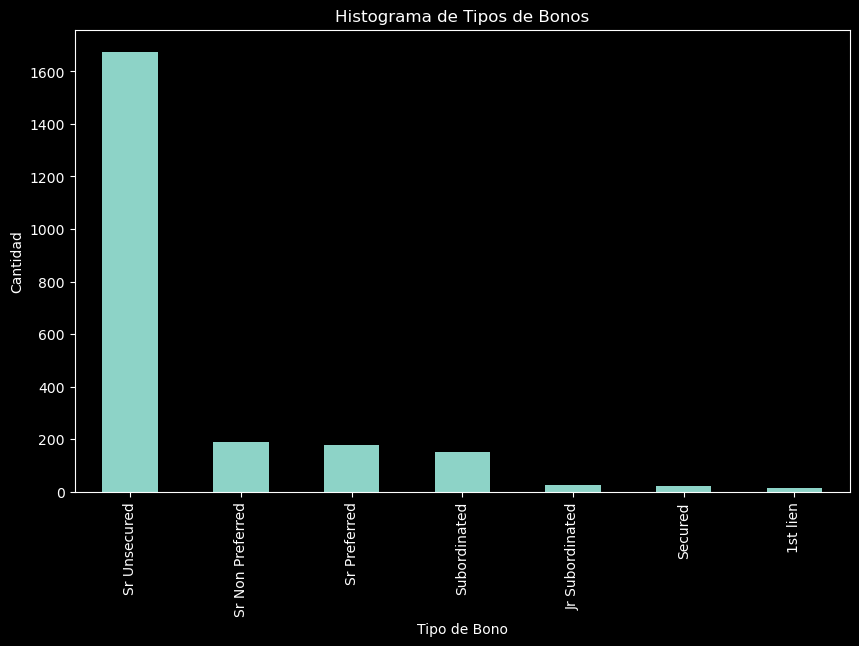

In [35]:
tipo_bono = df['Seniority']
#hisotgrama con conteo de tipos de bonos
plt.figure(figsize=(10,6))
tipo_bono.value_counts().plot(kind='bar')
plt.title('Histograma de Tipos de Bonos')
plt.xlabel('Tipo de Bono')
plt.ylabel('Cantidad')
plt.show()

In [36]:
# contar el numero de cupones por tipo
num_tipo_cupon = df['Coupon Type'].value_counts()
num_tipo_cupon

Coupon Type
FIXED       1910
VARIABLE     345
Name: count, dtype: int64

In [37]:
# Bonos perpetuos donde maturity date es null
bonos_perpetuos = df[df['Maturity'].isnull()]
bonos_perpetuos

,ISIN,Description,Ccy,Price,Issuer,Industry Sector,Maturity,Coupon,Rating,PD 1YR,...,Callable,Next Call Date,Seniority,Coupon Frequency,Coupon Type,First Coupon Date,Penultimate Coupon Date,Issue date,Bid Price,Ask Price
26,XS1115498260,ORAFP 5 PERP,EUR,102.19020,ORANGE SA,Communications,NaN,5.000,BBB-,2.142390e-05,...,Y,01/10/2026,Jr Subordinated,1,VARIABLE,01/10/2015,NaN,01/10/2014,101.894,102.486
54,XS1206541366,VW 3 ½ PERP,EUR,96.28500,VOLKSWAGEN INTL FIN NV,"Consumer, Cyclical",NaN,3.500,BBB-,4.212007e-02,...,Y,20/03/2030,Jr Subordinated,1,VARIABLE,20/03/2016,NaN,20/03/2015,96.012,96.558
120,XS1492580516,SLHNVX 4 ½ PERP,EUR,102.88900,ELM BV (SWISS LIFE),Financial,NaN,4.500,NR,2.039300e-07,...,Y,19/05/2027,Subordinated,1,VARIABLE,19/05/2017,NaN,27/09/2016,102.597,103.182
221,XS1629774230,VW 3 ⅞ PERP,EUR,100.09400,VOLKSWAGEN INTL FIN NV,"Consumer, Cyclical",NaN,3.875,BBB-,4.212007e-02,...,Y,14/06/2027,Jr Subordinated,1,VARIABLE,14/06/2018,NaN,14/06/2017,99.814,100.373
358,XS1799939027,VW 4 ⅝ PERP,EUR,101.62600,VOLKSWAGEN INTL FIN NV,"Consumer, Cyclical",NaN,4.625,BBB-,4.212007e-02,...,Y,27/06/2028,Jr Subordinated,1,VARIABLE,27/06/2019,NaN,27/06/2018,101.345,101.906
577,FR0013447877,ORAFP 1 ¾ PERP,EUR,98.31100,ORANGE SA,Communications,NaN,1.750,BBB-,2.142390e-05,...,Y,19/12/2026,Jr Subordinated,1,VARIABLE,19/03/2020,NaN,19/09/2019,98.043,98.579
596,XS2056730679,IFXGR 3 ⅝ PERP,EUR,100.76870,INFINEON TECHNOLOGIES AG,Technology,NaN,3.625,NR,1.247850e-04,...,Y,01/01/2028,Jr Subordinated,1,VARIABLE,01/04/2020,NaN,01/10/2019,100.475,101.062
850,XS2187689380,VW 3 ⅞ PERP,EUR,98.09600,VOLKSWAGEN INTL FIN NV,"Consumer, Cyclical",NaN,3.875,BBB-,4.212007e-02,...,Y,17/06/2029,Jr Subordinated,1,VARIABLE,17/06/2021,NaN,17/06/2020,97.803,98.389
885,XS2195190520,SSELN 3 ⅛ PERP,EUR,100.05300,SSE PLC,Utilities,NaN,3.125,BBB-,3.055990e-05,...,Y,14/04/2027,Jr Subordinated,1,VARIABLE,14/07/2021,NaN,14/07/2020,99.743,100.363
946,FR00140005L7,ORAFP 1 ¾ PERP,EUR,95.42167,ORANGE SA,Communications,NaN,1.750,BBB-,2.142390e-05,...,Y,15/07/2028,Jr Subordinated,1,VARIABLE,15/10/2021,NaN,15/10/2020,95.093,95.751


#### <font color=#808080>Sectores y emisores</font>

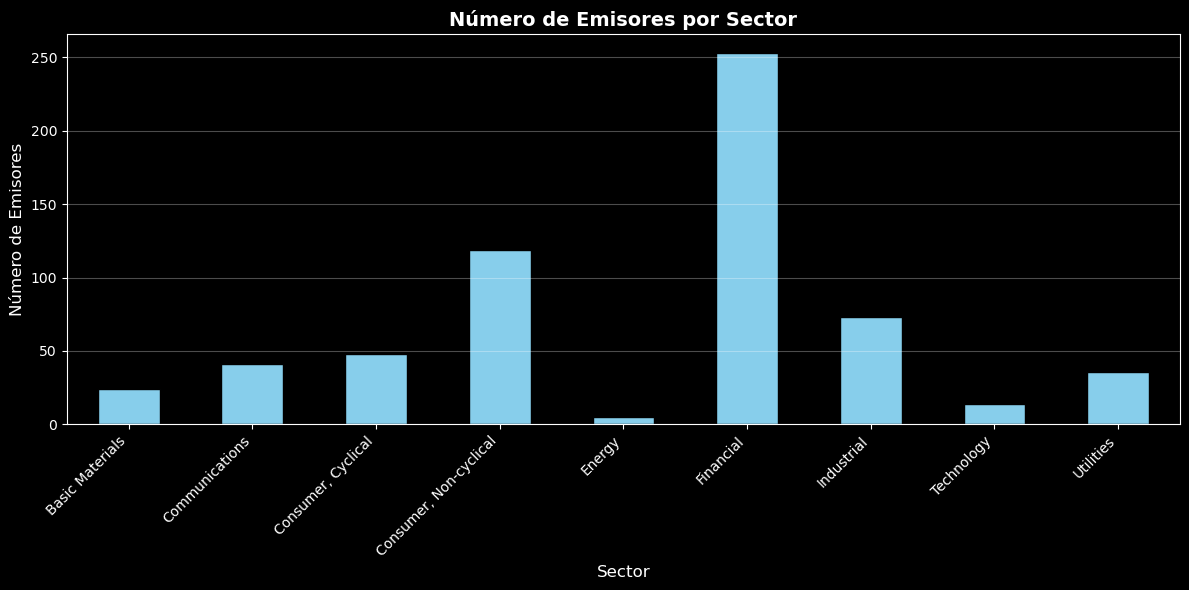


Número de emisores por sector:
Industry Sector
Financial                 253
Consumer, Non-cyclical    119
Industrial                 73
Consumer, Cyclical         48
Communications             41
Utilities                  36
Basic Materials            24
Technology                 14
Energy                      5
Name: Issuer, dtype: int64


In [38]:
sector_emisor = df['Industry Sector']

# Contar el número de emisores únicos por sector
emisores_por_sector = df.groupby('Industry Sector')['Issuer'].nunique()

# Crear el histograma
plt.figure(figsize=(12, 6))
emisores_por_sector.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de Emisores por Sector', fontsize=14, fontweight='bold')
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Número de Emisores', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar también los valores numéricos
print("\nNúmero de emisores por sector:")
print(emisores_por_sector.sort_values(ascending=False))

In [39]:
emisores_frecuencia  = df['Issuer'].value_counts()
print(emisores_frecuencia.sort_values(ascending=False))

Issuer
BANQUE FED CRED MUTUEL      33
BNP PARIBAS                 27
VONOVIA SE                  23
BPCE SA                     23
ORANGE SA                   23
                            ..
ABEILLE VIE SA D'ASSURAN     1
KNORR-BREMSE AG              1
SMITH & NEPHEW PLC           1
EUROCLEAR BANK SA            1
SUDZUCKER INT FINANCE        1
Name: count, Length: 613, dtype: int64


Si invirtéramos en todos los bonos, ¿dirías a priori que la cartera está diversificada?

NO , mucha concentración en mismo emisor y mismo sector

#### <font color=#808080>Ratings (Riesgo de crédito)</font>

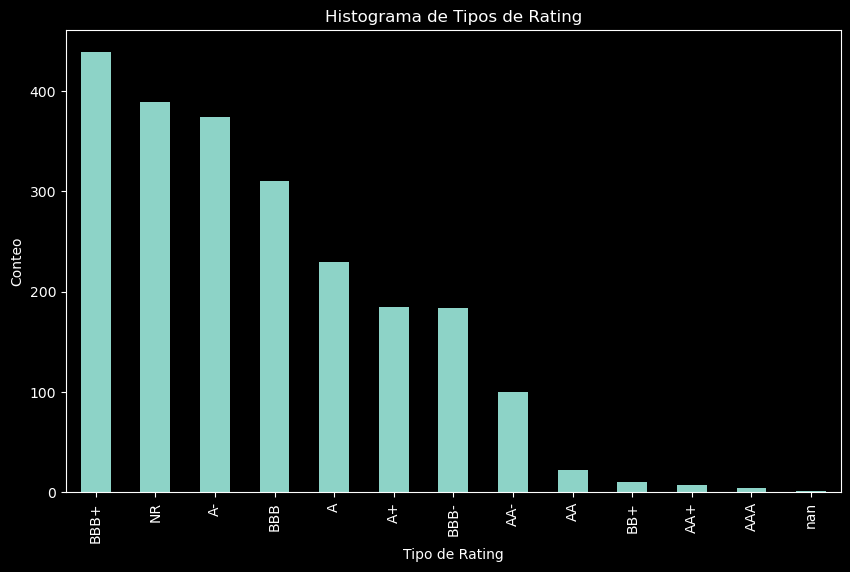

Rating
BBB+    439
NR      389
A-      374
BBB     310
A       230
A+      185
BBB-    184
AA-     100
AA       22
BB+      10
AA+       7
AAA       4
NaN       1
Name: count, dtype: int64


In [40]:
tip_rating = df['Rating']
#hisotgrama con conteo rating
plt.figure(figsize=(10,6))
tip_rating.value_counts(dropna=False).plot(kind='bar')
plt.title('Histograma de Tipos de Rating')
plt.xlabel('Tipo de Rating')
plt.ylabel('Conteo')
plt.show()

print(tip_rating.value_counts(dropna=False).sort_values(ascending=False))

In [41]:
df[df['ISIN'] == 'FI4000496286']

,ISIN,Description,Ccy,Price,Issuer,Industry Sector,Maturity,Coupon,Rating,PD 1YR,...,Callable,Next Call Date,Seniority,Coupon Frequency,Coupon Type,First Coupon Date,Penultimate Coupon Date,Issue date,Bid Price,Ask Price
1106,FI4000496286,NESVFH 0 ¾ 03/25/28,EUR,95.086,NESTE OYJ,Energy,25/03/2028,0.75,NaN,0.000436,...,Y,25/12/2027,Sr Unsecured,1,FIXED,25/03/2022,25/03/2027,25/03/2021,94.994,95.178


#### <font color=#808080>Riesgo de liquidez - Horquillas y nominal vivo</font>

**"La liquidez se ve reflejada en el bid/ask spread"**

In [42]:
df['spread'] = (abs(df['Bid Price'] - df['Ask Price'])).round(4)

In [43]:
df.groupby('Industry Sector')['spread'].mean().sort_values(ascending=False)

Industry Sector
Communications            0.414983
Basic Materials           0.356083
Technology                0.352902
Consumer, Cyclical        0.348029
Energy                    0.343615
Utilities                 0.335380
Industrial                0.326550
Consumer, Non-cyclical    0.322595
Financial                 0.305712
Name: spread, dtype: float64

In [44]:
df.groupby('Rating')['spread'].mean().sort_values(ascending=False)

Rating
AAA     0.424750
BBB-    0.376217
NR      0.345632
BBB     0.333787
BBB+    0.328141
AA-     0.321810
A-      0.314334
A       0.305291
BB+     0.302900
A+      0.292216
AA      0.273545
AA+     0.244857
Name: spread, dtype: float64

**El nominal vivo (outstanding amount) es la cantidad TOTAL emitida y actualmente en circulación en el mercado**



In [45]:
df.groupby('ISIN')[['Outstanding Amount', 'spread']].agg({'Outstanding Amount': 'sum', 'spread': 'mean'}).sort_values(by='Outstanding Amount', ascending=False)

,Outstanding Amount,spread
ISIN,,
CH1214797172,3000000000,0.240
XS2461234622,2500000000,0.210
XS1586555945,2500000000,0.191
XS2595028536,2000000000,0.180
XS1629774230,2000000000,0.559
...,...,...
XS2314267449,300000000,0.592
XS2717378231,300000000,0.456
FR0013321536,274300000,0.461


Qué relación existe entre el spread con el outstanding amount?:

Cuanto mayor es el tamaño de la emisión → más líquida → menor spread bid–ask

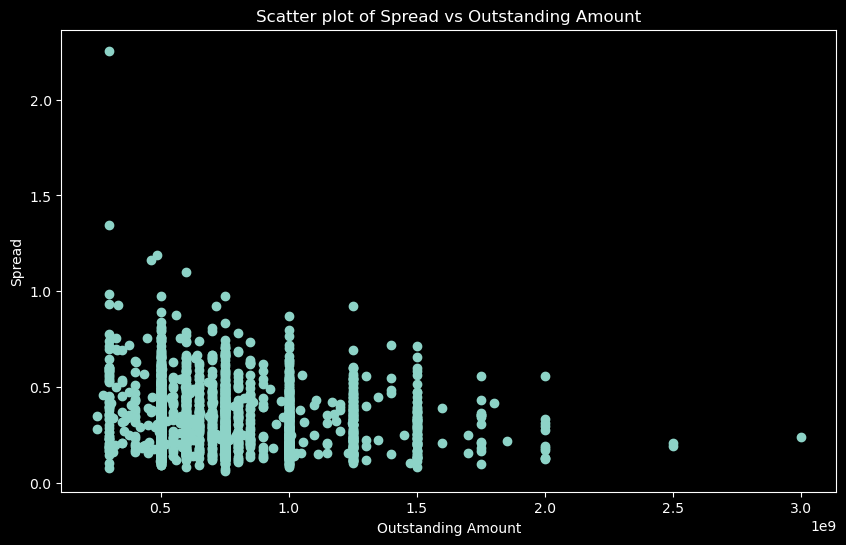

In [46]:
# Scatter plot spread vs outstanding amount
plt.figure(figsize=(10,6))
plt.scatter(df['Outstanding Amount'], df['spread'])
plt.title('Scatter plot of Spread vs Outstanding Amount')
plt.xlabel('Outstanding Amount')
plt.ylabel('Spread')
plt.show()

#### <font color=#808080>Resto de información</font>

En esta sección, analizamos el resto de ficheros para ver qué información tenemos y, en caso de haber *gaps*, limpiar los datos antes de trabajar con ellos.

##### <font color=#CC6600>Precios bonos universo</font>

In [47]:
# Cargar datos de precios históricos del universo
df_precios_universo = pd.read_csv('../data/precios_historicos_universo.csv', engine='python', sep=None)

# Renombrar primera columna a ISIN
df_precios_universo = df_precios_universo.rename(columns={'Unnamed: 0': 'ISIN'})

# Función para normalizar ISIN
def normalizar_isin(isin: str, formato='sin_corp') -> str:
    """Normaliza el formato del ISIN"""
    isin_clean = isin.strip()
    
    if formato == 'sin_corp':
        return isin_clean.replace(' Corp', '')
    elif formato == 'con_corp':
        if not isin_clean.endswith(' Corp'):
            return isin_clean + ' Corp'
    return isin_clean

# Aplicar normalización: remover ' Corp' del ISIN para hacer match con df
df_precios_universo['ISIN'] = df_precios_universo['ISIN'].apply(lambda x: normalizar_isin(x, formato='sin_corp'))

print("Precios históricos del universo cargados y normalizados correctamente")
print(f"Número de bonos: {len(df_precios_universo)}")
print(f"Número de fechas: {len(df_precios_universo.columns) - 1}")  # -1 para excluir columna ISIN
print(f"\nPrimeros ISINs:\n{df_precios_universo['ISIN'].head()}")

Precios históricos del universo cargados y normalizados correctamente
Número de bonos: 2255
Número de fechas: 732

Primeros ISINs:
0    XS0161488498
1    FR0000471930
2    XS0162513211
3    XS0162869076
4    FR0010014845
Name: ISIN, dtype: object


Elimino los fines de semana

In [48]:
# me cargo todas las columnas de precios que son 0 (sin datos)
df_precios_universo = df_precios_universo.loc[:, (df_precios_universo != 0).any(axis=0)]

# Eliminar columnas cuyas fechas corresponden a fines de semana
# Convertir los nombres de las columnas (fechas) a datetime, excluyendo la primera columna que es el ISIN
columnas_fecha = df_precios_universo.columns[1:]  # Excluir la primera columna (ISIN)
fechas_datetime = pd.to_datetime(columnas_fecha, format='%d/%m/%Y', errors='coerce')

# Crear máscara para identificar días que NO son fin de semana (lunes=0, domingo=6)
# weekday: 0-4 son días de semana, 5-6 son sábado y domingo
mascara_dias_semana = fechas_datetime.weekday < 5

# Mantener la primera columna (ISIN) y solo las columnas de días de semana
columnas_mantener = [df_precios_universo.columns[0]] + list(columnas_fecha[mascara_dias_semana])
df_precios_universo = df_precios_universo[columnas_mantener]
df_precios_universo = df_precios_universo.rename(columns={'Unnamed: 0': 'ISIN'})

print(f"Columnas eliminadas (fines de semana): {sum(~mascara_dias_semana)}")
print(f"Columnas restantes: {len(df_precios_universo.columns) - 1}")  # -1 para excluir columna ISIN

Columnas eliminadas (fines de semana): 209
Columnas restantes: 523


Top de los ISINs con mayor número de #N/D

In [49]:
# detectar '#N/D' y sacar los ISIN con mayor cantidad de estos valores
df_n_d_counts = df_precios_universo.set_index('ISIN').map(lambda x: x == '#N/D').sum(axis=1)
df_n_d_counts.sort_values(ascending=False)

ISIN
XS2732952838    61
XS2694995163    58
XS2724401588    57
FR001400MLN4    56
XS2731506841    56
                ..
DE000A3MQQV5     7
XS2101349723     0
XS1562614831     0
XS1511787589     0
ES0211845310     0
Length: 2255, dtype: int64

Cojo el issuance date y reviso el número de #N/d que hay a partir de ahí

In [50]:
# Para cada ISIN, contar #N/D a partir del issue date
def contar_nd_desde_issue_date(row_precios, issue_date_str, columnas_fechas):
    """
    Cuenta las celdas con #N/D en una fila a partir del issue date
    
    Args:
        row_precios: fila del dataframe de precios
        issue_date_str: fecha de emisión en formato string
        columnas_fechas: lista de columnas que son fechas
    
    Returns:
        número de celdas con #N/D desde el issue date
    """
    # Convertir issue date a datetime
    issue_date = pd.to_datetime(issue_date_str, format='%d/%m/%Y', errors='coerce')
    
    if pd.isna(issue_date):
        return None
    
    # Contar #N/D solo en columnas posteriores al issue date
    contador = 0
    for col in columnas_fechas:
        col_date = pd.to_datetime(col, format='%d/%m/%Y', errors='coerce')
        if not pd.isna(col_date) and col_date >= issue_date:
            if row_precios[col] == '#N/D':
                contador += 1
    
    return contador

# Preparar las columnas de fechas (todas excepto la primera que es ISIN)
columnas_fechas = df_precios_universo.columns[1:]

# Crear un diccionario para almacenar los resultados
resultados_nd = {}

# Iterar sobre cada bono del universo
for idx, row_universo in df.iterrows():
    isin = row_universo['ISIN'] + ' Corp'  # Añadir ' Corp' para hacer match con precios
    issue_date = row_universo['Issue date']
    
    # Buscar el ISIN en el dataframe de precios
    if isin in df_precios_universo['ISIN'].values:
        row_precios = df_precios_universo[df_precios_universo['ISIN'] == isin].iloc[0]
        num_nd = contar_nd_desde_issue_date(row_precios, issue_date, columnas_fechas)
        resultados_nd[isin] = num_nd

# Crear un dataframe con los resultados
df_resultados = pd.DataFrame.from_dict(resultados_nd, orient='index', columns=['#N/D desde issue date'])
df_resultados = df_resultados.sort_values(by='#N/D desde issue date', ascending=False)

print(f"Total de bonos analizados: {len(df_resultados)}")
print(f"\nTop 20 bonos con más #N/D desde su issue date:\n")
print(df_resultados.head(20))

Total de bonos analizados: 0

Top 20 bonos con más #N/D desde su issue date:

Empty DataFrame
Columns: [#N/D desde issue date]
Index: []


¿Qué hacemos con estos bonos?

##### <font color=#CC6600>Otros precios</font>

Para terminar con el análisis de datos, falta lo leído en los ficheros de *"precios_historicos_varios.csv"* y *curvaESTR.csv*.

In [51]:
df_precios_varios = pd.read_csv('../data/precios_historicos_varios.csv', engine='python', sep=None)
df_curva = pd.read_csv('../data/curvaESTR.csv', engine='python', sep=None)


Fecha inicial: 10/10/2025
Fecha final: 03/10/2075
Número de puntos: 32
Zero Rate mínimo: 1.9005%
Zero Rate máximo: 2.8694%


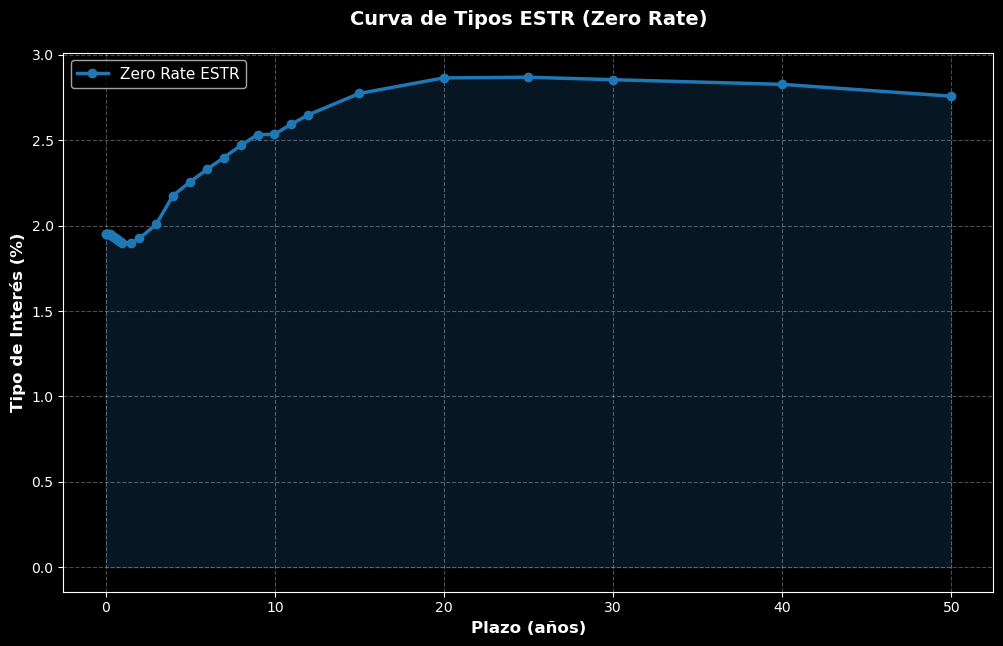

In [52]:
# Convertir la columna de fecha a datetime
df_curva['Date'] = pd.to_datetime(df_curva['Date'], format='%d/%m/%Y')

# Eliminar filas con valores nulos en las tasas
df_curva = df_curva.dropna(subset=['Market Rate', 'Zero Rate'])

# Calcular plazo en años desde la primera fecha
fecha_inicial = df_curva['Date'].iloc[0]
df_curva['Plazo (años)'] = (df_curva['Date'] - fecha_inicial).dt.days / 365.25

# Crear un gráfico adicional más simple y elegante
fig2, ax = plt.subplots(figsize=(12, 7))

ax.plot(df_curva['Plazo (años)'], df_curva['Zero Rate'], marker='o', linewidth=2.5, 
        markersize=6, color='#1f77b4', label='Zero Rate ESTR')
ax.fill_between(df_curva['Plazo (años)'], df_curva['Zero Rate'], alpha=0.2, color='#1f77b4')

ax.set_xlabel('Plazo (años)', fontsize=12, fontweight='bold')
ax.set_ylabel('Tipo de Interés (%)', fontsize=12, fontweight='bold')
ax.set_title('Curva de Tipos ESTR (Zero Rate)', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')

# Actualizar la leyenda para incluir ambas líneas
ax.legend(fontsize=11)

# Mostrar información adicional
print(f"\nFecha inicial: {fecha_inicial.strftime('%d/%m/%Y')}")
print(f"Fecha final: {df_curva['Date'].iloc[-1].strftime('%d/%m/%Y')}")
print(f"Número de puntos: {len(df_curva)}")
print(f"Zero Rate mínimo: {df_curva['Zero Rate'].min():.4f}%")
print(f"Zero Rate máximo: {df_curva['Zero Rate'].max():.4f}%")

plt.show()

### <font color=#336699>2. Valoración</font>

#### 2.1 Flujos de caja

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 En esta sección, valoraremos los bonos utilizando la curva. Para ello, crea una función (puedes hacerlo en un .py aparte) que con las **características del bono, la curva y un spread de crédito** devuelva la valoración del bono (incluyendo **precio limpio, cupón corrido y precio sucio**).

Si asumimos que el **spread de crédito es 0**, y la ejecutamos para el 01/10/2025...
- ¿Qué observas si comparas los precios obtenidos y los precios de mercado? 
visto en la primera clase
- ¿Crees que la diferencia se debe a un factor relacionado sólo con el riesgo crediticio?
- ¿Qué otros factores influyen en ese spread?

Para la valoración, haz las siguientes simplificaciones:

- Asume que el vencimiento de los bonos perpetuos (para los que no hay vencimiento) es la próxima fecha call.
- Asume que todos aquellos bonos que tengan call serán calleados. Por lo tanto, usa la fecha call como fecha de vencimiento.
- Asume que los cupones son fijos hasta vencimiento (aunque alguno cambie a lo largo de la vida del bono).
- Usa la base de cálculo ACT/365. No tengas en cuenta la convención de día hábil.

Ten en cuenta que necesitarás una función de interpolación también. Interpola los factores de descuento exponencialmente.

</div>

In [53]:
# Establecemos la fecha
fecha_valor = date(2025, 10, 1)

In [54]:
def determinar_fecha_vencimiento(row: pd.Series) -> date:
    """
    Determina la fecha de vencimiento efectiva según las reglas:
    - Si es callable (Callable = 'Y'): usa Next Call Date
    - Si es perpetuo (Maturity vacío/NaN): usa Next Call Date
    - Si no es callable: usa Maturity
    
    Especifica formato dd/mm/yyyy para evitar ambigüedades en la parseo.
    """
    callable = row['Callable']
    maturity = row['Maturity']
    next_call_date = row['Next Call Date']
    
    # Función auxiliar para parsear fechas en formato dd/mm/yyyy
    def parsear_fecha(fecha_str):
        if pd.isna(fecha_str) or fecha_str == '':
            return None
        fecha_str = str(fecha_str).strip()
        try:
            # Intentar primero con formato dd/mm/yyyy
            return pd.to_datetime(fecha_str, format='%d/%m/%Y', dayfirst=True).date()
        except:
            try:
                # Si falla, intentar con dayfirst=True para mayor flexibilidad
                return pd.to_datetime(fecha_str, dayfirst=True).date()
            except:
                # Último recurso
                return pd.to_datetime(fecha_str).date()
    
    # Si es callable, usar Next Call Date
    if callable == 'Y':
        fecha = parsear_fecha(next_call_date)
        if fecha:
            return fecha
    
    # Si maturity es NaN o está vacío (perpetuo), usar Next Call Date
    if pd.isna(maturity) or maturity == '':
        fecha = parsear_fecha(next_call_date)
        if fecha:
            return fecha
    
    # Si no es callable y tiene maturity, usar Maturity
    fecha = parsear_fecha(maturity)
    if fecha:
        return fecha
    
    # No debería llegar aquí
    raise ValueError(f"No se pudo parsear la fecha de vencimiento")

In [55]:
def limpiar_tasa_cupon(cupon_valor) -> float:
    """
    Convierte el cupón de porcentaje a decimal.
    Ej: 5.0 -> 0.05, "5%" -> 0.05
    """
    if pd.isna(cupon_valor):
        return 0.0
    
    cupon_str = str(cupon_valor).strip()
    
    # Remover símbolo de porcentaje si existe
    if '%' in cupon_str:
        cupon_str = cupon_str.replace('%', '')
    
    valor = float(cupon_str)
    
    # Convertir de porcentaje a decimal
    return valor / 100

In [56]:
def calcular_flujos_caja(
    fecha_valoracion: date,
    fecha_vencimiento: date,
    nominal: float,
    tasa_cupon: float,
    frecuencia_pago: int
) -> List[Tuple[date, float]]:
    """
    Calcula los flujos de caja futuros (fecha, monto) de un bono 
    desde la fecha de valoración hasta el vencimiento.
    
    Normaliza las fechas de cupón para que tengan consistencia en el día del mes.
    
    Args:
        fecha_valoracion: Fecha desde la cual calcular flujos futuros
        fecha_vencimiento: Fecha de vencimiento o call del bono
        nominal: Outstanding Amount del bono
        tasa_cupon: Tasa de cupón anual en decimal (ej: 0.05 para 5%)
        frecuencia_pago: 1 = Anual, 2 = Semestral, 4 = Trimestral, 12 = Mensual
    
    Returns:
        Lista de tuplas (fecha, monto) ordenadas cronológicamente
    """
    
    flujos = []
    
    # Caso especial: Sin cupones (tasa = 0)
    if tasa_cupon == 0:
        # Solo hay un flujo: el nominal al vencimiento
        if fecha_vencimiento > fecha_valoracion:
            flujos.append((fecha_vencimiento, nominal))
        return flujos
    
    # 1. Calcular el monto de cada cupón periódico
    monto_cupon_periodico = (nominal * tasa_cupon) / frecuencia_pago
    
    # 2. Determinar el salto en meses entre pagos
    if frecuencia_pago == 1:
        meses_salto = 12
    elif frecuencia_pago == 2:
        meses_salto = 6
    elif frecuencia_pago == 4:
        meses_salto = 3
    elif frecuencia_pago == 12:
        meses_salto = 1
    else:
        raise ValueError(f"Frecuencia de pago '{frecuencia_pago}' no soportada. Use 1, 2, 4 o 12.")
    
    # 3. Guardar el día de vencimiento para mantener consistencia
    dia_vencimiento = fecha_vencimiento.day
    
    # 4. Generar flujos trabajando hacia atrás desde el vencimiento
    fecha_flujo = fecha_vencimiento
    
    while fecha_flujo > fecha_valoracion:
        monto_flujo = 0
        
        # 5. Añadir el principal (nominal) en la fecha de vencimiento
        if fecha_flujo == fecha_vencimiento:
            monto_flujo += nominal
        
        # 6. Añadir el cupón periódico
        monto_flujo += monto_cupon_periodico
        
        # Guardamos el flujo
        flujos.append((fecha_flujo, monto_flujo))
        
        # 7. Retrocedemos a la fecha de pago anterior
        # Restamos los meses y luego ajustamos el día para mantenerlo consistente
        fecha_temp = fecha_flujo - relativedelta(months=meses_salto)
        
        # Normalizar el día al día del mes del vencimiento
        # Si el mes anterior no tiene suficientes días, usar el último día del mes
        try:
            fecha_flujo = fecha_temp.replace(day=dia_vencimiento)
        except ValueError:
            # Si el día no existe en ese mes (ej: 31 de febrero), usar último día del mes
            from calendar import monthrange
            ultimo_dia = monthrange(fecha_temp.year, fecha_temp.month)[1]
            fecha_flujo = fecha_temp.replace(day=ultimo_dia)
        
    # 8. Los flujos se generaron de último a primero. Los ordenamos cronológicamente.
    flujos.reverse()
    
    return flujos

In [57]:
def procesar_bonos(df: pd.DataFrame, fecha_valoracion: date) -> pd.DataFrame:
    """
    Procesa el dataframe completo y calcula los flujos de caja para cada bono.
    
    Args:
        df: DataFrame con los bonos
        fecha_valoracion: Fecha fija de valoración
    
    Returns:
        DataFrame con los resultados incluyendo flujos de caja
    """
    resultados = []
    
    for idx, row in df.iterrows():
        try:
            # Determinar fecha de vencimiento efectiva
            fecha_venc = determinar_fecha_vencimiento(row)
            
            # Obtener parámetros del bono
            nominal = float(row['Outstanding Amount'])
            tasa_cupon = limpiar_tasa_cupon(row['Coupon'])
            frecuencia = int(row['Coupon Frequency'])
            
            # Calcular flujos
            flujos = calcular_flujos_caja(
                fecha_valoracion=fecha_valoracion,
                fecha_vencimiento=fecha_venc,
                nominal=nominal,
                tasa_cupon=tasa_cupon,
                frecuencia_pago=frecuencia
            )
            
            # Calcular valor presente total de los flujos (suma simple)
            valor_total_flujos = sum([monto for _, monto in flujos])
            
            # Guardar resultado
            resultados.append({
                'ISIN': row['ISIN'],
                'Description': row['Description'],
                'Callable': row['Callable'],
                'Maturity': row['Maturity'],
                'Fecha_valoracion': fecha_valoracion,
                'Next_Call_Date': row['Next Call Date'],
                'Fecha_Vencimiento_Efectiva': fecha_venc,
                'Outstanding_Amount': nominal,
                'Coupon_Rate': tasa_cupon,
                'Coupon_Frequency': frecuencia,
                'Numero_Flujos': len(flujos),
                'Flujos_Caja': flujos
            })
            
        except Exception as e:
            print(f"Error procesando ISIN {row['ISIN']}: {str(e)}")
            resultados.append({
                'ISIN': row['ISIN'],
                'Description': row['Description'],
                'Error': str(e)
            })
            continue
    
    return pd.DataFrame(resultados)

In [58]:
# Definir fecha de valoración fija
fecha_valoracion = date(2025, 10, 1)  # Ajusta según necesites

# Procesar todos los bonos
df_flujos = procesar_bonos(df, fecha_valoracion)

df_flujos

,ISIN,Description,Callable,Maturity,Fecha_valoracion,Next_Call_Date,Fecha_Vencimiento_Efectiva,Outstanding_Amount,Coupon_Rate,Coupon_Frequency,Numero_Flujos,Flujos_Caja
0,XS0161488498,DT 7 ½ 01/24/33,N,24/01/2033,2025-10-01,NaN,2033-01-24,5.000000e+08,0.07500,1,8,"[(2026-01-24, 37500000.0), (2027-01-24, 375000..."
1,FR0000471930,ORAFP 8 ⅛ 01/28/33,N,28/01/2033,2025-10-01,NaN,2033-01-28,1.500000e+09,0.08125,1,8,"[(2026-01-28, 121875000.0), (2027-01-28, 12187..."
2,XS0162513211,EOANGR 5 ¾ 02/14/33,N,14/02/2033,2025-10-01,NaN,2033-02-14,6.000000e+08,0.05750,1,8,"[(2026-02-14, 34500000.0), (2027-02-14, 345000..."
3,XS0162869076,TELEFO 5 ⅞ 02/14/33,N,14/02/2033,2025-10-01,NaN,2033-02-14,5.000000e+08,0.05875,1,8,"[(2026-02-14, 29375000.0), (2027-02-14, 293750..."
4,FR0010014845,PEUGOT 6 09/19/33,N,19/09/2033,2025-10-01,NaN,2033-09-19,6.000000e+08,0.06000,1,8,"[(2026-09-19, 36000000.0), (2027-09-19, 360000..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2250,XS2724401588,TVLRO 7 ¼ 12/07/28,Y,07/12/2028,2025-10-01,07/12/2027,2027-12-07,5.000000e+08,0.07250,1,3,"[(2025-12-07, 36250000.0), (2026-12-07, 362500..."
2251,XS2731506841,MET 3 ¾ 12/07/31,N,07/12/2031,2025-10-01,NaN,2031-12-07,5.000000e+08,0.03750,1,7,"[(2025-12-07, 18750000.0), (2026-12-07, 187500..."
2252,FR001400MLN4,URWFP 4 ⅛ 12/11/30,Y,11/12/2030,2025-10-01,11/09/2030,2030-09-11,7.500000e+08,0.04125,1,5,"[(2026-09-11, 30937500.0), (2027-09-11, 309375..."
2253,XS2732952838,SYK 3 ⅜ 12/11/28,Y,11/12/2028,2025-10-01,11/09/2028,2028-09-11,6.000000e+08,0.03375,1,3,"[(2026-09-11, 20250000.0), (2027-09-11, 202500..."


In [59]:
# Diagnóstico: Verificar formato de fechas en flujos de caja
print("=" * 80)
print("DIAGNÓSTICO DE FECHAS EN FLUJOS DE CAJA")
print("=" * 80)

# Tomar el primer bono con flujos
for idx, row in df_flujos.iterrows():
    if row['Numero_Flujos'] > 0 and 'Error' not in row:
        print(f"\nISIN: {row['ISIN']}")
        print(f"Fecha de Valoración: {row['Fecha_valoracion']} (tipo: {type(row['Fecha_valoracion']).__name__})")
        print(f"Fecha Vencimiento Efectiva: {row['Fecha_Vencimiento_Efectiva']} (tipo: {type(row['Fecha_Vencimiento_Efectiva']).__name__})")
        print(f"\nPrimeros 3 flujos de caja:")
        
        for i, (fecha_flujo, monto) in enumerate(row['Flujos_Caja'][:3]):
            print(f"  {i+1}. Fecha: {fecha_flujo} (tipo: {type(fecha_flujo).__name__}) | Monto: {monto:.2f}")
        
        # Mostrar diferencias entre días consecutivos
        if len(row['Flujos_Caja']) >= 2:
            print(f"\nDías entre flujos consecutivos:")
            for i in range(min(3, len(row['Flujos_Caja']) - 1)):
                fecha1 = row['Flujos_Caja'][i][0]
                fecha2 = row['Flujos_Caja'][i+1][0]
                dias_diff = (fecha2 - fecha1).days
                print(f"  Flujo {i+1} -> Flujo {i+2}: {dias_diff} días")
        
        break  # Solo mostrar el primero para el diagnóstico

DIAGNÓSTICO DE FECHAS EN FLUJOS DE CAJA

ISIN: XS0161488498
Fecha de Valoración: 2025-10-01 (tipo: date)
Fecha Vencimiento Efectiva: 2033-01-24 (tipo: date)

Primeros 3 flujos de caja:
  1. Fecha: 2026-01-24 (tipo: date) | Monto: 37500000.00
  2. Fecha: 2027-01-24 (tipo: date) | Monto: 37500000.00
  3. Fecha: 2028-01-24 (tipo: date) | Monto: 37500000.00

Días entre flujos consecutivos:
  Flujo 1 -> Flujo 2: 365 días
  Flujo 2 -> Flujo 3: 365 días
  Flujo 3 -> Flujo 4: 366 días


#### 2.2 Cálculo del cupón corrido

In [82]:
from datetime import date
from typing import List, Tuple
from dateutil.relativedelta import relativedelta
from math import floor # Necesario para la función

def calcular_cupon_corrido(
    fecha_valoracion: date,
    flujos_caja: List[Tuple[date, float]],
    outstanding_amount: float,
    coupon_rate: float,
    frecuencia_pago: int
) -> Tuple[float, float]:
    """
    Calcula el cupón corrido (accrued interest) de un bono.

    Fórmula: Cupón Corrido = (Outstanding Amount × Coupon Rate × Días transcurridos) / 365
    (Usando la convención de días ACT/365, como se especifica en la fórmula).

    Args:
        fecha_valoracion: Fecha de valoración (ej: 2025-10-01)
        flujos_caja: Lista de tuplas (fecha, monto) de flujos futuros
        outstanding_amount: Nominal del bono
        coupon_rate: Tasa de cupón anual (en decimal, ej: 0.05 para 5%)
        frecuencia_pago: 1=Anual, 2=Semestral, 4=Trimestral, 12=Mensual

    Returns:
        Tuple[float, float]: (Cupón corrido en unidades monetarias, Cupón corrido en %)
    """
    print(f"--- Cálculo de Cupón Corrido para {fecha_valoracion} ---")
    print(f"Flujos de Caja Futuros: {flujos_caja}")

    # Caso especial: sin flujos futuros o cupón cero
    if not flujos_caja or coupon_rate == 0:
        return (0.0, 0.0)
    
    # 1. Determinar el periodo del cupón en meses
    if frecuencia_pago == 1:
        meses_periodo = 12
    elif frecuencia_pago == 2:
        meses_periodo = 6
    elif frecuencia_pago == 4:
        meses_periodo = 3
    elif frecuencia_pago == 12:
        meses_periodo = 1
    else:
        raise ValueError(f"Frecuencia de pago '{frecuencia_pago}' no soportada.")
    
    # 2. Identificar el primer cupón futuro y el último cupón pagado
    fecha_primer_cupon_futuro = flujos_caja[0][0]
    
    # El último cupón pagado es el primer cupón futuro menos un período
    fecha_ultimo_cupon_pagado = fecha_primer_cupon_futuro - relativedelta(months=meses_periodo)
    
    print(f"Fecha primer cupón futuro: {fecha_primer_cupon_futuro}")
    print(f"Fecha último cupón pagado: {fecha_ultimo_cupon_pagado}")

    # 3. Determinar la fecha de inicio del periodo de acumulación
    # Si la fecha de valoración es anterior al primer cupón futuro, usamos el último cupón pagado.
    # En el caso del vencimiento, la fecha de valoración será igual a la del cupón.
    if fecha_valoracion < fecha_primer_cupon_futuro:
        fecha_inicio_periodo = fecha_ultimo_cupon_pagado
    else:
        # Esto ocurre si la fecha_valoracion es igual o posterior al primer cupón futuro.
        # Implica que se está valorando justo en la fecha de pago o después.
        # Si la fecha de valoración es la de vencimiento (que coincide con un pago de cupón),
        # y no hay más flujos, se considera el cupón como pagado y el CC es 0, o, 
        # si es el último periodo, se toma el anterior pago de cupón.
        
        # Para ser estrictos en el último periodo (Vencimiento):
        # Buscamos el último flujo de caja que sea *anterior* o *igual* a la fecha de valoración
        # que sea la fecha de inicio de este último periodo (que comienza después del penúltimo pago).
        
        # Una forma simple es asumir que, si la valoración es la fecha del pago (vencimiento)
        # el cupón se considera ya pagado o liquidado, y el CC es 0, a menos que el
        # periodo de acumulación empiece después del último cupón pagado.
        
        # Aquí, usaremos la lógica de tu diagrama: el último cupón pagado es el 02/11/24
        # y la valoración (01/10/25) cae antes del 02/11/25. Por lo tanto, el 'if' es suficiente.
        # Si fuera el vencimiento 02/11/26 (el último día), el CC debería ser el cupón entero
        # (desde 02/11/25 hasta 02/11/26). Para fines de cálculo, el inicio sigue siendo
        # la fecha del último cupón *pagado*, que es 02/11/25.
        
        # Para simplificar y seguir la convención estándar (Accrued Interest = 0 si está 'Ex-Cupón'):
        if fecha_valoracion >= fecha_primer_cupon_futuro:
             # print(f"Fecha de valoración es igual o posterior a la fecha del próximo cupón ({fecha_primer_cupon_futuro}). Cupón corrido es 0 (Ex-Cupón).")
             return (0.0, 0.0)
        
        fecha_inicio_periodo = fecha_ultimo_cupon_pagado # Mantenemos la lógica por si el if de arriba se omite.
        
    # 4. Cálculo de Días Transcurridos
    dias_transcurridos = (fecha_valoracion - fecha_inicio_periodo).days
    
    # Si por alguna razón la fecha de inicio es igual o posterior a la de valoración (error de datos), retornamos 0
    if dias_transcurridos < 0:
        print("Error: Días transcurridos es negativo. Retornando 0.0")
        return (0.0, 0.0)
    
    # print(f"Días transcurridos desde {fecha_inicio_periodo} hasta {fecha_valoracion}: {dias_transcurridos}")

    # 5. Cálculo del Cupón Corrido (Base ACT/365)
    
    # Cupón corrido en unidades monetarias: (Nominal * Tasa * Días) / Base de días
    cupon_corrido = (outstanding_amount * coupon_rate * dias_transcurridos) / 365.0
    
    # Cupón corrido en porcentaje: (Tasa * Días) / Base de días * 100
    cupon_corrido_pct = (coupon_rate * (dias_transcurridos / 365.0)) * 100
    
    # El resultado se redondea a 6 decimales para precisión estándar en bonos
    cupon_corrido_redondeado = round(cupon_corrido, 6)
    cupon_corrido_pct_redondeado = round(cupon_corrido_pct, 6)
    
    # print(f"Cupón corrido (monetario): {cupon_corrido_redondeado}")
    # print(f"Cupón corrido (%): {cupon_corrido_pct_redondeado}%")

    return (cupon_corrido_redondeado, cupon_corrido_pct_redondeado)

In [83]:
# Aplicar la función al DataFrame df_flujos para crear la columna Cupon_Corrido
df_flujos[['Cupon_Corrido', 'Cupon_Corrido_Pct']] = df_flujos.apply(
    lambda row: calcular_cupon_corrido(
        fecha_valoracion=row['Fecha_valoracion'],
        flujos_caja=row['Flujos_Caja'],
        outstanding_amount=row['Outstanding_Amount'],
        coupon_rate=row['Coupon_Rate'],
        frecuencia_pago=row['Coupon_Frequency']
    ),
    axis=1,
    result_type='expand'
)
df_flujos

--- Cálculo de Cupón Corrido para 2025-10-01 ---
Flujos de Caja Futuros: [(datetime.date(2026, 1, 24), 37500000.0), (datetime.date(2027, 1, 24), 37500000.0), (datetime.date(2028, 1, 24), 37500000.0), (datetime.date(2029, 1, 24), 37500000.0), (datetime.date(2030, 1, 24), 37500000.0), (datetime.date(2031, 1, 24), 37500000.0), (datetime.date(2032, 1, 24), 37500000.0), (datetime.date(2033, 1, 24), 537500000.0)]
Fecha primer cupón futuro: 2026-01-24
Fecha último cupón pagado: 2025-01-24
--- Cálculo de Cupón Corrido para 2025-10-01 ---
Flujos de Caja Futuros: [(datetime.date(2026, 1, 28), 121875000.0), (datetime.date(2027, 1, 28), 121875000.0), (datetime.date(2028, 1, 28), 121875000.0), (datetime.date(2029, 1, 28), 121875000.0), (datetime.date(2030, 1, 28), 121875000.0), (datetime.date(2031, 1, 28), 121875000.0), (datetime.date(2032, 1, 28), 121875000.0), (datetime.date(2033, 1, 28), 1621875000.0)]
Fecha primer cupón futuro: 2026-01-28
Fecha último cupón pagado: 2025-01-28
--- Cálculo de Cup

,ISIN,Description,Callable,Maturity,Fecha_valoracion,Next_Call_Date,Fecha_Vencimiento_Efectiva,Outstanding_Amount,Coupon_Rate,Coupon_Frequency,...,Precio_Sucio_Pct,Precio_Mercado,Z_Spread_bps,Precio_con_ZSpread,Diferencia_Precio,YTM,YTM_pct,Duracion_Macaulay,Duracion_Modificada,Convexidad
0,XS0161488498,DT 7 ½ 01/24/33,N,24/01/2033,2025-10-01,NaN,2033-01-24,5.000000e+08,0.07500,1,...,138.894833,127.8353,74.378485,127.8353,9.947598e-14,0.031703,3.170252,5.874317,5.693809,42.849975
1,FR0000471930,ORAFP 8 ⅛ 01/28/33,N,28/01/2033,2025-10-01,NaN,2033-01-28,1.500000e+09,0.08125,1,...,143.447053,131.3195,81.904379,131.3195,1.136868e-13,0.032457,3.245671,5.815082,5.632277,42.221667
2,XS0162513211,EOANGR 5 ¾ 02/14/33,N,14/02/2033,2025-10-01,NaN,2033-02-14,6.000000e+08,0.05750,1,...,125.825080,115.7800,85.550665,115.7800,3.268497e-13,0.032980,3.298011,6.154879,5.958371,45.666526
3,XS0162869076,TELEFO 5 ⅞ 02/14/33,N,14/02/2033,2025-10-01,NaN,2033-02-14,5.000000e+08,0.05875,1,...,126.742884,116.3000,89.516733,116.3000,3.410605e-13,0.033383,3.338268,6.137410,5.939146,45.456296
4,FR0010014845,PEUGOT 6 09/19/33,N,19/09/2033,2025-10-01,NaN,2033-09-19,6.000000e+08,0.06000,1,...,125.560351,112.3887,163.401057,112.3887,1.510614e-11,0.041393,4.139256,6.710305,6.443588,52.128798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,XS2724401588,TVLRO 7 ¼ 12/07/28,Y,07/12/2028,2025-10-01,07/12/2027,2027-12-07,5.000000e+08,0.07250,1,...,117.103346,107.8130,146.225277,107.8130,-3.268497e-13,0.034643,3.464290,1.998280,1.931371,5.852012
2251,XS2731506841,MET 3 ¾ 12/07/31,N,07/12/2031,2025-10-01,NaN,2031-12-07,5.000000e+08,0.03750,1,...,111.015256,103.2010,79.658551,103.2010,0.000000e+00,0.031688,3.168771,5.499076,5.330175,35.950114
2252,FR001400MLN4,URWFP 4 ⅛ 12/11/30,Y,11/12/2030,2025-10-01,11/09/2030,2030-09-11,7.500000e+08,0.04125,1,...,108.846098,104.4336,85.656730,104.4336,1.794990e-08,0.031405,3.140513,4.579966,4.440511,24.934108
2253,XS2732952838,SYK 3 ⅜ 12/11/28,Y,11/12/2028,2025-10-01,11/09/2028,2028-09-11,6.000000e+08,0.03375,1,...,104.010492,102.2970,51.904914,102.2970,-8.370193e-12,0.025524,2.552353,2.850822,2.779870,10.580983


#### 2.3 Descuento de los flujos

In [62]:
# Cargar la curva ESTR
# Nota: El archivo tiene formato semicolon-separated
df_curva_estr = pd.read_csv('../data/curvaESTR.csv', sep=';')

# Convertir la columna Date a datetime
df_curva_estr['Date'] = pd.to_datetime(df_curva_estr['Date'], format='%d/%m/%Y', errors='coerce')

# Eliminar filas con fechas NaN o valores nulos
df_curva_estr = df_curva_estr.dropna(subset=['Date', 'Discount'])

# Convertir tipos de datos
df_curva_estr['Zero Rate'] = pd.to_numeric(df_curva_estr['Zero Rate'], errors='coerce')
df_curva_estr['Discount'] = pd.to_numeric(df_curva_estr['Discount'], errors='coerce')

# Resetear el índice
df_curva_estr = df_curva_estr.reset_index(drop=True)

print("Curva ESTR cargada correctamente")
print(f"Número de puntos en la curva: {len(df_curva_estr)}")
print("\nPrimeros puntos de la curva:")
print(df_curva_estr.head(10))
print("\nÚltimos puntos de la curva:")
print(df_curva_estr.tail(5))

Curva ESTR cargada correctamente
Número de puntos en la curva: 33

Primeros puntos de la curva:
        Date  Market Rate  Zero Rate  Discount
0 2025-10-01          NaN        NaN  1.000000
1 2025-10-10      1.92700    1.95350  0.999518
2 2025-10-17      1.92800    1.95402  0.999144
3 2025-11-03      1.92800    1.95320  0.998236
4 2025-12-03      1.92900    1.95264  0.996635
5 2026-01-05      1.92710    1.94907  0.994887
6 2026-02-03      1.92745    1.94523  0.993360
7 2026-03-03      1.92210    1.94115  0.991896
8 2026-04-07      1.91720    1.93447  0.990086
9 2026-05-04      1.91180    1.92772  0.988709

Últimos puntos de la curva:
         Date  Market Rate  Zero Rate  Discount
28 2045-10-03      2.80180    2.86536  0.563481
29 2050-10-03      2.81430    2.86943  0.487733
30 2055-10-04      2.81090    2.85489  0.424328
31 2065-10-05      2.80175    2.82775  0.322328
32 2075-10-03      2.76800    2.75841  0.251512


In [63]:
def interpolar_factor_descuento(
    fecha_flujo: date,
    df_curva: pd.DataFrame,
    fecha_valoracion: date
) -> float:
    """
    Interpola el factor de descuento para una fecha dada utilizando interpolación log-lineal.
    
    Si la fecha coincide exactamente con un punto de la curva, retorna el factor de descuento directo.
    Si no, interpola log-linealmente entre los dos puntos más cercanos.
    
    Args:
        fecha_flujo: Fecha del flujo a descontar
        df_curva: DataFrame con la curva ESTR (Date, Discount)
        fecha_valoracion: Fecha de valoración (origen)
    
    Returns:
        float: Factor de descuento para la fecha del flujo
    """
    
    # Convertir fecha_flujo a datetime para comparar
    fecha_flujo_dt = pd.Timestamp(fecha_flujo)
    
    # Buscar coincidencia exacta
    coincidencia = df_curva[df_curva['Date'] == fecha_flujo_dt]
    if not coincidencia.empty:
        return float(coincidencia['Discount'].iloc[0])
    
    # No hay coincidencia exacta: interpolar
    # Encontrar el punto inmediatamente anterior e inmediatamente posterior
    puntos_anteriores = df_curva[df_curva['Date'] < fecha_flujo_dt]
    puntos_posteriores = df_curva[df_curva['Date'] > fecha_flujo_dt]
    
    # Validaciones
    if puntos_anteriores.empty:
        # El flujo es anterior al primer punto de la curva
        # Usar el primer factor de descuento disponible
        return float(df_curva['Discount'].iloc[0])
    
    if puntos_posteriores.empty:
        # El flujo es posterior al último punto de la curva
        # Extrapolar usando el último punto
        return float(df_curva['Discount'].iloc[-1])
    
    # Obtener los dos puntos para interpolar
    punto_1 = puntos_anteriores.iloc[-1]  # Punto más cercano anterior
    punto_2 = puntos_posteriores.iloc[0]  # Punto más cercano posterior
    
    # Extraer fechas y factores de descuento
    t1 = punto_1['Date']
    t2 = punto_2['Date']
    df1 = float(punto_1['Discount'])
    df2 = float(punto_2['Discount'])
    
    # Calcular plazos en años (base ACT/365)
    T1 = (t1 - pd.Timestamp(fecha_valoracion)).days / 365.0
    T2 = (t2 - pd.Timestamp(fecha_valoracion)).days / 365.0
    T_flujo = (fecha_flujo_dt - pd.Timestamp(fecha_valoracion)).days / 365.0
    
    # Interpolación log-lineal de factores de descuento:
    # ln(DF(T)) = ln(DF(T1)) + (ln(DF(T2)) - ln(DF(T1))) * (T - T1) / (T2 - T1)
    
    log_df1 = np.log(df1)
    log_df2 = np.log(df2)
    
    log_df_flujo = log_df1 + (log_df2 - log_df1) * (T_flujo - T1) / (T2 - T1)
    
    df_flujo = np.exp(log_df_flujo)
    
    return df_flujo

In [64]:
class MetodoDescuento(Enum):
    """Métodos de descuento disponibles"""
    CURVA = "curva"  # Usando curva de tipos + spread
    YIELD = "yield"   # Usando yield único constante


def calcular_valor_presente(
    flujos_caja,  # List[Tuple[date, float]] o List[Tuple[float, float]]
    fecha_valoracion: Optional[date] = None,
    metodo: MetodoDescuento = MetodoDescuento.YIELD,
    # Parámetros para método CURVA
    df_curva: Optional[pd.DataFrame] = None,
    spread_credito: float = 0.0,
    # Parámetros para método YIELD
    yield_anual: Optional[float] = None,
    frecuencia: int = 2,
    # Formato de flujos
    flujos_como_fechas: bool = True
) -> float:
    """
    Calcula el valor presente de flujos de caja usando diferentes métodos de descuento.
    
    Args:
        flujos_caja: Lista de tuplas (fecha, monto) si flujos_como_fechas=True
                     o (tiempo_años, monto) si flujos_como_fechas=False
        fecha_valoracion: Fecha de valoración (requerido si flujos_como_fechas=True)
        metodo: Método de descuento (CURVA o YIELD)
        
        # Para método CURVA (valoración mark-to-market):
        df_curva: DataFrame con la curva ESTR (columnas: 'Date', 'Discount')
        spread_credito: Spread de crédito en decimal (ej: 0.01 para 100 bps)
        
        # Para método YIELD (cálculo de YTM):
        yield_anual: Yield anual en decimal (ej: 0.03 para 3%)
        frecuencia: Frecuencia de capitalización (1=anual, 2=semestral, 4=trimestral)
        
        # Formato de flujos:
        flujos_como_fechas: Si True, flujos_caja contiene (fecha, monto)
                           Si False, flujos_caja contiene (tiempo_años, monto)
    
    Returns:
        float: Valor presente de los flujos
        
    Raises:
        ValueError: Si faltan parámetros requeridos según el método elegido
        
    Examples:
        >>> # Valoración con curva de mercado
        >>> vp = calcular_valor_presente(
        ...     flujos, fecha_val, MetodoDescuento.CURVA,
        ...     df_curva=curva_estr, spread_credito=0.01
        ... )
        
        >>> # Valoración con yield único (flujos como fechas)
        >>> vp = calcular_valor_presente(
        ...     flujos, fecha_val, MetodoDescuento.YIELD,
        ...     yield_anual=0.03, frecuencia=2
        ... )
        
        >>> # Valoración con yield único (flujos como tiempos)
        >>> vp = calcular_valor_presente(
        ...     flujos_tiempo, metodo=MetodoDescuento.YIELD,
        ...     yield_anual=0.03, frecuencia=2, flujos_como_fechas=False
        ... )
    """
    
    if metodo == MetodoDescuento.CURVA:
        # ============ MÉTODO CURVA ============
        if df_curva is None:
            raise ValueError("Se requiere 'df_curva' para el método CURVA")
        if not flujos_como_fechas:
            raise ValueError("El método CURVA requiere flujos_como_fechas=True")
        if fecha_valoracion is None:
            raise ValueError("Se requiere 'fecha_valoracion' para el método CURVA")
        
        valor_presente = 0.0
        
        for fecha_flujo, monto_flujo in flujos_caja:
            # Obtener factor de descuento de la curva (interpolado si es necesario)
            df_curva_flujo = interpolar_factor_descuento(
                fecha_flujo, df_curva, fecha_valoracion
            )
            
            # Calcular plazo en años (ACT/365)
            plazo_anos = (fecha_flujo - fecha_valoracion).days / 365.0
            
            # Aplicar spread de crédito con capitalización continua
            # DF_ajustado = DF_curva × exp(-spread × T)
            factor_descuento_ajustado = df_curva_flujo * np.exp(-spread_credito * plazo_anos)
            
            # Descontar el flujo
            valor_presente += monto_flujo * factor_descuento_ajustado
        
        return valor_presente
    
    elif metodo == MetodoDescuento.YIELD:
        # ============ MÉTODO YIELD ============
        if yield_anual is None:
            raise ValueError("Se requiere 'yield_anual' para el método YIELD")
        
        valor_presente = 0.0
        
        if flujos_como_fechas:
            # Flujos en formato (fecha, monto)
            if fecha_valoracion is None:
                raise ValueError("Se requiere 'fecha_valoracion' cuando flujos_como_fechas=True")
            
            for fecha_flujo, monto_flujo in flujos_caja:
                # Calcular tiempo en años (ACT/365)
                tiempo_anos = (fecha_flujo - fecha_valoracion).days / 365.0
                
                # Descuento con composición periódica
                # DF = 1 / (1 + y/freq)^(t × freq)
                factor_descuento = (1 + yield_anual / frecuencia) ** (tiempo_anos * frecuencia)
                valor_presente += monto_flujo / factor_descuento
        else:
            # Flujos en formato (tiempo_años, monto)
            for tiempo_anos, monto_flujo in flujos_caja:
                # Descuento con composición periódica
                # DF = 1 / (1 + y/freq)^(t × freq)
                factor_descuento = (1 + yield_anual / frecuencia) ** (tiempo_anos * frecuencia)
                valor_presente += monto_flujo / factor_descuento
        
        return valor_presente
    
    else:
        raise ValueError(f"Método de descuento no reconocido: {metodo}")

In [65]:
def descontar_flujos(
    flujos_caja: List[Tuple[date, float]],
    df_curva: pd.DataFrame,
    fecha_valoracion: date,
    spread_credito: float = 0.0
) -> float:
    """
    Descuenta los flujos de caja utilizando la curva ESTR y un spread de crédito opcional.
    
    NOTA: Esta función es un wrapper de calcular_valor_presente() para mantener
    compatibilidad con código existente. Para nuevos desarrollos, usar directamente
    calcular_valor_presente() con MetodoDescuento.CURVA.
    
    Utiliza capitalización continua:
    Precio = Σ [Flujo_i × DF(T_i) × exp(-spread × T_i)]
    
    Args:
        flujos_caja: Lista de tuplas (fecha, monto)
        df_curva: DataFrame con la curva ESTR
        fecha_valoracion: Fecha de valoración
        spread_credito: Spread de crédito en decimal (ej: 0.01 para 100 bps)
    
    Returns:
        float: Valor presente de los flujos (precio sucio)
    """
    return calcular_valor_presente(
        flujos_caja=flujos_caja,
        fecha_valoracion=fecha_valoracion,
        metodo=MetodoDescuento.CURVA,
        df_curva=df_curva,
        spread_credito=spread_credito
    )

In [66]:
# Calcular precio sucio (valor presente de todos los flujos)
df_flujos['Precio_Sucio'] = df_flujos.apply(
    lambda row: descontar_flujos(
        flujos_caja=row['Flujos_Caja'],
        df_curva=df_curva_estr,
        fecha_valoracion=row['Fecha_valoracion'],
        spread_credito=0.0  # Spread de crédito = 0 por ahora
    ),
    axis=1
)

# Calcular precio limpio (precio sucio - cupón corrido)
df_flujos['Precio_Limpio'] = df_flujos['Precio_Sucio'] - df_flujos['Cupon_Corrido']

# Convertir a precio por unidad de nominal (100 = par)
df_flujos['Precio_Limpio_Pct'] = (df_flujos['Precio_Limpio'] / df_flujos['Outstanding_Amount']) * 100
df_flujos['Precio_Sucio_Pct'] = (df_flujos['Precio_Sucio'] / df_flujos['Outstanding_Amount']) * 100

In [67]:
df_flujos

,ISIN,Description,Callable,Maturity,Fecha_valoracion,Next_Call_Date,Fecha_Vencimiento_Efectiva,Outstanding_Amount,Coupon_Rate,Coupon_Frequency,Numero_Flujos,Flujos_Caja,Cupon_Corrido,Cupon_Corrido_Pct,Precio_Sucio,Precio_Limpio,Precio_Limpio_Pct,Precio_Sucio_Pct
0,XS0161488498,DT 7 ½ 01/24/33,N,24/01/2033,2025-10-01,NaN,2033-01-24,5.000000e+08,0.07500,1,8,"[(2026-01-24, 37500000.0), (2027-01-24, 375000...",2.568493e+07,5.136986,6.944742e+08,6.687892e+08,133.757847,138.894833
1,FR0000471930,ORAFP 8 ⅛ 01/28/33,N,28/01/2033,2025-10-01,NaN,2033-01-28,1.500000e+09,0.08125,1,8,"[(2026-01-28, 121875000.0), (2027-01-28, 12187...",8.214041e+07,5.476027,2.151706e+09,2.069565e+09,137.971025,143.447053
2,XS0162513211,EOANGR 5 ¾ 02/14/33,N,14/02/2033,2025-10-01,NaN,2033-02-14,6.000000e+08,0.05750,1,8,"[(2026-02-14, 34500000.0), (2027-02-14, 345000...",2.164521e+07,3.607534,7.549505e+08,7.333053e+08,122.217546,125.825080
3,XS0162869076,TELEFO 5 ⅞ 02/14/33,N,14/02/2033,2025-10-01,NaN,2033-02-14,5.000000e+08,0.05875,1,8,"[(2026-02-14, 29375000.0), (2027-02-14, 293750...",1.842979e+07,3.685959,6.337144e+08,6.152846e+08,123.056925,126.742884
4,FR0010014845,PEUGOT 6 09/19/33,N,19/09/2033,2025-10-01,NaN,2033-09-19,6.000000e+08,0.06000,1,8,"[(2026-09-19, 36000000.0), (2027-09-19, 360000...",1.183562e+06,0.197260,7.533621e+08,7.521785e+08,125.363091,125.560351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,XS2724401588,TVLRO 7 ¼ 12/07/28,Y,07/12/2028,2025-10-01,07/12/2027,2027-12-07,5.000000e+08,0.07250,1,3,"[(2025-12-07, 36250000.0), (2026-12-07, 362500...",2.959589e+07,5.919178,5.855167e+08,5.559208e+08,111.184167,117.103346
2251,XS2731506841,MET 3 ¾ 12/07/31,N,07/12/2031,2025-10-01,NaN,2031-12-07,5.000000e+08,0.03750,1,7,"[(2025-12-07, 18750000.0), (2026-12-07, 187500...",1.530822e+07,3.061644,5.550763e+08,5.397681e+08,107.953612,111.015256
2252,FR001400MLN4,URWFP 4 ⅛ 12/11/30,Y,11/12/2030,2025-10-01,11/09/2030,2030-09-11,7.500000e+08,0.04125,1,5,"[(2026-09-11, 30937500.0), (2027-09-11, 309375...",1.695205e+06,0.226027,8.163457e+08,8.146505e+08,108.620071,108.846098
2253,XS2732952838,SYK 3 ⅜ 12/11/28,Y,11/12/2028,2025-10-01,11/09/2028,2028-09-11,6.000000e+08,0.03375,1,3,"[(2026-09-11, 20250000.0), (2027-09-11, 202500...",1.109589e+06,0.184932,6.240630e+08,6.229534e+08,103.825560,104.010492


### <font color=#336699>3. Spread</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Calculemos ahora los spreads que debemos añadir a la curva con un movimiento paralelo para que cuadren los precios de mercado que tenemos. Para ello, usa la función de valoración del apartado anterior. 

Z SPREAD
- ¿Qué observas? ¿Tienen sentido los resultados? 
- ¿Con qué datos de los que tenemos compararías para ver si los resultados son coherentes?

</div>

#### 3.1 Brent

In [68]:
# ------------------------------------------------------------
# Función para calcular Z-Spread con el método de Brent
# ------------------------------------------------------------
def calcular_z_spread(
    precio_mercado_limpio: float,
    flujos_caja: List[Tuple[date, float]],
    cupon_corrido: float,
    df_curva: pd.DataFrame,
    fecha_valoracion: date,
    outstanding_amount: float
) -> float:
    """
    Calcula el Z-spread de un bono usando el método de Brent.
    """

    if not flujos_caja or outstanding_amount == 0:
        return np.nan

    precio_mercado_limpio_abs = (precio_mercado_limpio / 100.0) * outstanding_amount
    precio_mercado_sucio = precio_mercado_limpio_abs + cupon_corrido

    # Definir función raíz: VP(spread) - PrecioMercadoSucio = 0
    def funcion_raiz(spread):
        vp = descontar_flujos(
            flujos_caja=flujos_caja,
            df_curva=df_curva,
            fecha_valoracion=fecha_valoracion,
            spread_credito=spread
        )
        return vp - precio_mercado_sucio

    try:
        f_a = funcion_raiz(-0.05)
        f_b = funcion_raiz(0.20)

        # Verificar que exista cambio de signo
        if f_a * f_b > 0:
            return np.nan

        # Ejecutar método de Brent
        resultado = brentq(funcion_raiz, -0.05, 0.20, xtol=1e-10, rtol=1e-8, maxiter=100, full_output=False)
        spread_opt = float(resultado)
        return spread_opt * 10000  # convertir a bps

    except Exception as e:
        print(f"Error en cálculo de Z-spread: {e}")
        return np.nan


In [69]:
print("Calculando Z-spread para todos los bonos...")
print("Esto puede tardar algunos minutos debido a la optimización numérica...\n")

# Obtener precios de mercado del DataFrame base
precio_mercado_dict = dict(zip(df['ISIN'], df['Price']))

# Añadir precio de mercado al DataFrame de flujos
df_flujos['Precio_Mercado'] = df_flujos['ISIN'].map(precio_mercado_dict)

# Calcular Z-Spread para cada bono
df_flujos['Z_Spread_bps'] = df_flujos.apply(
    lambda row: calcular_z_spread(
        precio_mercado_limpio=row['Precio_Mercado'],
        flujos_caja=row['Flujos_Caja'],
        cupon_corrido=row['Cupon_Corrido'],
        df_curva=df_curva_estr,
        fecha_valoracion=row['Fecha_valoracion'],
        outstanding_amount=row['Outstanding_Amount']
    ) if not pd.isna(row['Precio_Mercado']) else np.nan,
    axis=1
)

print("✅ Cálculo de Z-spread completado.\n")

Calculando Z-spread para todos los bonos...
Esto puede tardar algunos minutos debido a la optimización numérica...

✅ Cálculo de Z-spread completado.

✅ Cálculo de Z-spread completado.



In [70]:
def calcular_precio_con_spread(row):
    if pd.isna(row['Z_Spread_bps']):
        return np.nan

    precio_sucio = descontar_flujos(
        flujos_caja=row['Flujos_Caja'],
        df_curva=df_curva_estr,
        fecha_valoracion=row['Fecha_valoracion'],
        spread_credito=row['Z_Spread_bps'] / 10000
    )
    precio_limpio = precio_sucio - row['Cupon_Corrido']
    return (precio_limpio / row['Outstanding_Amount']) * 100

df_flujos['Precio_con_ZSpread'] = df_flujos.apply(calcular_precio_con_spread, axis=1)
df_flujos['Diferencia_Precio'] = df_flujos['Precio_con_ZSpread'] - df_flujos['Precio_Mercado']

In [71]:
df_flujos

,ISIN,Description,Callable,Maturity,Fecha_valoracion,Next_Call_Date,Fecha_Vencimiento_Efectiva,Outstanding_Amount,Coupon_Rate,Coupon_Frequency,...,Cupon_Corrido,Cupon_Corrido_Pct,Precio_Sucio,Precio_Limpio,Precio_Limpio_Pct,Precio_Sucio_Pct,Precio_Mercado,Z_Spread_bps,Precio_con_ZSpread,Diferencia_Precio
0,XS0161488498,DT 7 ½ 01/24/33,N,24/01/2033,2025-10-01,NaN,2033-01-24,5.000000e+08,0.07500,1,...,2.568493e+07,5.136986,6.944742e+08,6.687892e+08,133.757847,138.894833,127.8353,74.378485,127.8353,9.947598e-14
1,FR0000471930,ORAFP 8 ⅛ 01/28/33,N,28/01/2033,2025-10-01,NaN,2033-01-28,1.500000e+09,0.08125,1,...,8.214041e+07,5.476027,2.151706e+09,2.069565e+09,137.971025,143.447053,131.3195,81.904379,131.3195,1.136868e-13
2,XS0162513211,EOANGR 5 ¾ 02/14/33,N,14/02/2033,2025-10-01,NaN,2033-02-14,6.000000e+08,0.05750,1,...,2.164521e+07,3.607534,7.549505e+08,7.333053e+08,122.217546,125.825080,115.7800,85.550665,115.7800,3.268497e-13
3,XS0162869076,TELEFO 5 ⅞ 02/14/33,N,14/02/2033,2025-10-01,NaN,2033-02-14,5.000000e+08,0.05875,1,...,1.842979e+07,3.685959,6.337144e+08,6.152846e+08,123.056925,126.742884,116.3000,89.516733,116.3000,3.410605e-13
4,FR0010014845,PEUGOT 6 09/19/33,N,19/09/2033,2025-10-01,NaN,2033-09-19,6.000000e+08,0.06000,1,...,1.183562e+06,0.197260,7.533621e+08,7.521785e+08,125.363091,125.560351,112.3887,163.401057,112.3887,1.510614e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,XS2724401588,TVLRO 7 ¼ 12/07/28,Y,07/12/2028,2025-10-01,07/12/2027,2027-12-07,5.000000e+08,0.07250,1,...,2.959589e+07,5.919178,5.855167e+08,5.559208e+08,111.184167,117.103346,107.8130,146.225277,107.8130,-3.268497e-13
2251,XS2731506841,MET 3 ¾ 12/07/31,N,07/12/2031,2025-10-01,NaN,2031-12-07,5.000000e+08,0.03750,1,...,1.530822e+07,3.061644,5.550763e+08,5.397681e+08,107.953612,111.015256,103.2010,79.658551,103.2010,0.000000e+00
2252,FR001400MLN4,URWFP 4 ⅛ 12/11/30,Y,11/12/2030,2025-10-01,11/09/2030,2030-09-11,7.500000e+08,0.04125,1,...,1.695205e+06,0.226027,8.163457e+08,8.146505e+08,108.620071,108.846098,104.4336,85.656730,104.4336,1.794990e-08
2253,XS2732952838,SYK 3 ⅜ 12/11/28,Y,11/12/2028,2025-10-01,11/09/2028,2028-09-11,6.000000e+08,0.03375,1,...,1.109589e+06,0.184932,6.240630e+08,6.229534e+08,103.825560,104.010492,102.2970,51.904914,102.2970,-8.370193e-12


### <font color=#336699>4. YTM, Duración, Convexidad</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Calculemos ahora la siguiente información, también relacionada con la rentabilidad y riesgo de las emisiones:
- *Yield* - Por simplicidad, en este caso, en el caso de los bonos callable, nos quedaremos con la fecha call, como en el ejercicio anterior. Usa las mismas asunciones que para la valoración y el spread.
- Duración
- Convexidad

Responde a las siguientes preguntas:
- ¿Que relación hay entre la TIR calculada y el spread calculado en el apartado anterior?
- ¿Qué relación hay entre la duración y el vencimiento? ¿Qué refleja la duración? ¿De qué otra forma se podría obtener esta sensibilidad?
- Estima el precio del bono usando la duración y convexidad, ¿qué observas?

</div>

#### 4.1 Yield

In [72]:
def calcular_yield(precio_sucio_mercado, flujos, frecuencia=2, guess=0.03):
    """
    Calcula el Yield to Maturity (YTM) de un bono a partir del precio de mercado.
    
    El YTM es la tasa interna de retorno (TIR) que iguala el valor presente 
    de todos los flujos de caja futuros con el precio de mercado del bono.
    
    Args:
        precio_sucio_mercado (float): Precio objetivo (Dirty Price) del bono en el mercado.
                                       Puede ser en términos absolutos o como % del nominal.
        flujos (list): Lista de tuplas [(tiempo_en_años, monto)] con los flujos de caja del bono.
                      - tiempo_en_años: Tiempo hasta el flujo en años (fracción de año)
                      - monto: Cantidad del flujo de caja
        frecuencia (int): Frecuencia de composición anual. Por defecto 2 (semestral).
                         Usualmente coincide con la frecuencia de pago de cupones.
        guess (float): Estimación inicial del yield como tasa anual (ej: 0.03 = 3%).
    
    Returns:
        float: Yield to Maturity como tasa anual (ej: 0.0325 = 3.25%)
               o np.nan si no se encuentra solución.
    
    Ejemplo:
        >>> flujos = [(0.5, 2.5), (1.0, 2.5), (1.5, 2.5), (2.0, 102.5)]
        >>> precio = 100.0
        >>> ytm = calcular_yield(precio, flujos, frecuencia=2)
        >>> print(f"YTM: {ytm*100:.4f}%")
    """
    from scipy.optimize import brentq
    import numpy as np
    
    # Validación de inputs
    if not flujos or len(flujos) == 0:
        return np.nan
    
    if precio_sucio_mercado <= 0:
        return np.nan
    
    def valor_presente_flujos(yield_anual):
        """
        Calcula el valor presente de todos los flujos dado un yield.
        
        NOTA: Utiliza la función unificada calcular_valor_presente() 
        con método YIELD y formato de flujos como tiempo en años.
        """
        return calcular_valor_presente(
            flujos_caja=flujos,
            metodo=MetodoDescuento.YIELD,
            yield_anual=yield_anual,
            frecuencia=frecuencia,
            flujos_como_fechas=False
        )
    
    def diferencia_precio(yield_anual):
        """
        Función objetivo: diferencia entre el VP de flujos y el precio de mercado.
        Buscamos el yield que haga esta diferencia = 0
        """
        return valor_presente_flujos(yield_anual) - precio_sucio_mercado # cambiar el precio sucio de mercado
    
    try:
        # Determinar rango de búsqueda basado en la estimación inicial
        # Amplio rango: desde -2% hasta +50% anual
        lower_bound = -0.02
        upper_bound = 0.50
        
        # Verificar que hay un cambio de signo en el rango
        diff_lower = diferencia_precio(lower_bound)
        diff_upper = diferencia_precio(upper_bound)
        
        if diff_lower * diff_upper > 0:
            # No hay cambio de signo, intentar con rango más amplio
            if diff_lower > 0:  # Precio muy bajo, necesitamos yields más altos
                upper_bound = 1.0
            else:  # Precio muy alto, necesitamos yields más bajos (incluso negativos)
                lower_bound = -0.10
            
            diff_lower = diferencia_precio(lower_bound)
            diff_upper = diferencia_precio(upper_bound)
            
            if diff_lower * diff_upper > 0:
                # Aún no hay solución en el rango
                return np.nan
        
        # Usar el método de Brent para encontrar la raíz
        ytm = brentq(
            diferencia_precio,
            lower_bound,
            upper_bound,
            xtol=1e-10,      # Tolerancia absoluta
            rtol=1e-8,       # Tolerancia relativa
            maxiter=100      # Máximo de iteraciones
        )
        
        return ytm
        
    except Exception as e:
        print(f"Error en cálculo de YTM: {e}")
        return np.nan

In [73]:
def convertir_flujos_a_tiempo(flujos_caja, fecha_valoracion):
    """Convierte flujos de caja (fecha, monto) a (tiempo_años, monto)"""
    flujos_tiempo = []
    for fecha_flujo, monto in flujos_caja:
        tiempo_anos = (fecha_flujo - fecha_valoracion).days / 365.0
        flujos_tiempo.append((tiempo_anos, monto))
    return flujos_tiempo


def calcular_ytm_bono(row):
    """
    Calcula YTM de un bono usando el precio de mercado.
    
    CORRECCIÓN CRÍTICA: Usa el precio sucio de MERCADO,
    no el precio teórico calculado con la curva.
    """
    if pd.isna(row['Precio_Mercado']):
        return np.nan
    
    # Convertir flujos a formato de tiempo
    flujos_tiempo = convertir_flujos_a_tiempo(
        row['Flujos_Caja'], 
        row['Fecha_valoracion']
    )
    
    # ✅ CORRECCIÓN: Calcular precio sucio de MERCADO
    # Precio de mercado (limpio) + cupón corrido = precio sucio de mercado
    precio_sucio_mercado = (
        (row['Precio_Mercado'] / 100) * row['Outstanding_Amount'] 
        + row['Cupon_Corrido']
    )
    
    # Calcular YTM
    ytm = calcular_yield(
        precio_sucio_mercado=precio_sucio_mercado,
        flujos=flujos_tiempo,
        frecuencia=int(row['Coupon_Frequency']),
        guess=0.03
    )
    
    return ytm


# Aplicar el cálculo de YTM a todo el DataFrame
print("Calculando YTM para todos los bonos usando precio de mercado...")
df_flujos['YTM'] = df_flujos.apply(calcular_ytm_bono, axis=1)
df_flujos['YTM_pct'] = df_flujos['YTM'] * 100

print("✅ Cálculo de YTM completado correctamente.\n")

# Verificación: Mostrar bonos con YTM calculado
bonos_con_ytm = df_flujos[~df_flujos['YTM'].isna()]
print(f"Bonos con YTM calculado: {len(bonos_con_ytm)}/{len(df_flujos)}")
print("\nEstadísticas de YTM:")
print(df_flujos['YTM_pct'].describe())

Calculando YTM para todos los bonos usando precio de mercado...
✅ Cálculo de YTM completado correctamente.

Bonos con YTM calculado: 2255/2255

Estadísticas de YTM:
count    2255.000000
mean        2.965096
std         0.608245
min         2.021589
25%         2.605651
50%         2.894724
75%         3.206965
max        21.283700
Name: YTM_pct, dtype: float64


#### 4.2 Duración

In [74]:
def calcular_duraciones(
    flujos_caja: list,
    fecha_valoracion: date,
    df_curva: pd.DataFrame,
    ytm: float = None,
    precio_limpio: float = None
) -> tuple:
    """
    Calcula la Duración de Macaulay y Duración Modificada de un bono.

    Parámetros:
        flujos_caja: Lista de tuplas (fecha, monto) con los flujos futuros
        fecha_valoracion: Fecha de valoración
        df_curva: DataFrame con la curva ESTR (columnas: 'Date', 'Discount')
        ytm: Yield to Maturity (opcional). Si no se proporciona, se usa aproximación 3%
        precio_limpio: Precio limpio del bono (opcional, se calcula si no se proporciona)

    Retorna:
        tuple: (duracion_macaulay, duracion_modificada, precio_limpio)
    """
    if not flujos_caja:
        return None, None, None

    # Si no se proporciona el precio limpio, calcularlo usando la función existente
    if precio_limpio is None:
        precio_limpio = calcular_valor_presente(
            flujos_caja=flujos_caja,
            fecha_valoracion=fecha_valoracion,
            metodo=MetodoDescuento.CURVA,
            df_curva=df_curva,
            spread_credito=0.0,
            flujos_como_fechas=True
        )

    if precio_limpio == 0:
        return None, None, None

    # Calcular la suma ponderada por tiempo para la duración de Macaulay
    suma_ponderada_tiempo = 0.0

    for fecha_flujo, monto_flujo in flujos_caja:
        # Calcular tiempo en años desde la fecha de valoración
        tiempo_anos = (fecha_flujo - fecha_valoracion).days / 365.25

        # Obtener factor de descuento usando la función existente
        factor_descuento = interpolar_factor_descuento(
            fecha_flujo=fecha_flujo,
            df_curva=df_curva,
            fecha_valoracion=fecha_valoracion
        )

        # Valor presente del flujo
        vp_flujo = monto_flujo * factor_descuento

        # Para duración: VP * tiempo
        suma_ponderada_tiempo += vp_flujo * tiempo_anos

    # Duración de Macaulay (en años)
    duracion_macaulay = suma_ponderada_tiempo / precio_limpio

    # Duración Modificada usando el YTM proporcionado o aproximación
    if ytm is None:
        ytm = 0.03  # Aproximación por defecto 3%

    duracion_modificada = duracion_macaulay / (1 + ytm)

    return duracion_macaulay, duracion_modificada, precio_limpio

#### 4.3 Convexidad

In [75]:
def calcular_convexidad(
    flujos_caja: list,
    fecha_valoracion: date,
    df_curva: pd.DataFrame,
    precio_limpio: float = None,
    ytm: float = None
) -> float:
    """
    Calcula la Convexidad de un bono.

    Parámetros:
        flujos_caja: Lista de tuplas (fecha, monto) con los flujos futuros
        fecha_valoracion: Fecha de valoración
        df_curva: DataFrame con la curva ESTR (columnas: 'Date', 'Discount')
        precio_limpio: Precio limpio del bono (opcional, se calcula si no se proporciona)
        ytm: Yield to Maturity (opcional, se usa si se proporciona)

    Retorna:
        float: convexidad
    """
    if not flujos_caja:
        return None

    # Si no se proporciona el precio limpio, calcularlo usando la función existente
    if precio_limpio is None:
        precio_limpio = calcular_valor_presente(
            flujos_caja=flujos_caja,
            fecha_valoracion=fecha_valoracion,
            metodo=MetodoDescuento.CURVA,
            df_curva=df_curva,
            spread_credito=0.0,
            flujos_como_fechas=True
        )

    if precio_limpio == 0:
        return None

    # Calcular la suma ponderada para convexidad
    suma_ponderada_convexidad = 0.0

    for fecha_flujo, monto_flujo in flujos_caja:
        # Calcular tiempo en años desde la fecha de valoración
        tiempo_anos = (fecha_flujo - fecha_valoracion).days / 365.25

        # Obtener factor de descuento usando la función existente
        factor_descuento = interpolar_factor_descuento(
            fecha_flujo=fecha_flujo,
            df_curva=df_curva,
            fecha_valoracion=fecha_valoracion
        )

        # Valor presente del flujo
        vp_flujo = monto_flujo * factor_descuento

        # Para convexidad: VP * tiempo * (tiempo + 1)
        suma_ponderada_convexidad += vp_flujo * tiempo_anos * (tiempo_anos + 1)

    # Convexidad
    # Si tenemos YTM, usar la fórmula ajustada por YTM
    if ytm is not None:
        convexidad = suma_ponderada_convexidad / (precio_limpio * (1 + ytm) ** 2)
    else:
        convexidad = suma_ponderada_convexidad / precio_limpio

    return convexidad

In [76]:
# Aplicar el cálculo a todos los bonos de forma optimizada
print("Calculando Duración de Macaulay, Duración Modificada y Convexidad...")

# Calcular duraciones (reutilizando YTM y Precio_Limpio ya calculados)
resultados_duraciones = df_flujos.apply(
    lambda row: calcular_duraciones(
        flujos_caja=row['Flujos_Caja'],
        fecha_valoracion=row['Fecha_valoracion'],
        df_curva=df_curva_estr,
        ytm=row['YTM'],  # Usar el YTM ya calculado
        precio_limpio=row['Precio_Sucio']  # Usar el precio limpio ya calculado
    ),
    axis=1
)

# Separar los resultados de duración en columnas individuales
df_flujos['Duracion_Macaulay'] = resultados_duraciones.apply(lambda x: x[0])
df_flujos['Duracion_Modificada'] = resultados_duraciones.apply(lambda x: x[1])
# Nota: x[2] es el precio_limpio, pero ya lo tenemos en df_flujos['Precio_Limpio']

# Calcular convexidad (reutilizando precio_limpio y YTM ya calculados)
df_flujos['Convexidad'] = df_flujos.apply(
    lambda row: calcular_convexidad(
        flujos_caja=row['Flujos_Caja'],
        fecha_valoracion=row['Fecha_valoracion'],
        df_curva=df_curva_estr,
        precio_limpio=row['Precio_Sucio'],  # Usar precio sucio en lugar de precio limpio
        ytm=row['YTM']  # Usar el YTM ya calculado
    ),
    axis=1
)

print("✅ Cálculo de Duración y Convexidad completado.\n")

df_flujos

Calculando Duración de Macaulay, Duración Modificada y Convexidad...
✅ Cálculo de Duración y Convexidad completado.

✅ Cálculo de Duración y Convexidad completado.



,ISIN,Description,Callable,Maturity,Fecha_valoracion,Next_Call_Date,Fecha_Vencimiento_Efectiva,Outstanding_Amount,Coupon_Rate,Coupon_Frequency,...,Precio_Sucio_Pct,Precio_Mercado,Z_Spread_bps,Precio_con_ZSpread,Diferencia_Precio,YTM,YTM_pct,Duracion_Macaulay,Duracion_Modificada,Convexidad
0,XS0161488498,DT 7 ½ 01/24/33,N,24/01/2033,2025-10-01,NaN,2033-01-24,5.000000e+08,0.07500,1,...,138.894833,127.8353,74.378485,127.8353,9.947598e-14,0.031703,3.170252,5.874317,5.693809,42.849975
1,FR0000471930,ORAFP 8 ⅛ 01/28/33,N,28/01/2033,2025-10-01,NaN,2033-01-28,1.500000e+09,0.08125,1,...,143.447053,131.3195,81.904379,131.3195,1.136868e-13,0.032457,3.245671,5.815082,5.632277,42.221667
2,XS0162513211,EOANGR 5 ¾ 02/14/33,N,14/02/2033,2025-10-01,NaN,2033-02-14,6.000000e+08,0.05750,1,...,125.825080,115.7800,85.550665,115.7800,3.268497e-13,0.032980,3.298011,6.154879,5.958371,45.666526
3,XS0162869076,TELEFO 5 ⅞ 02/14/33,N,14/02/2033,2025-10-01,NaN,2033-02-14,5.000000e+08,0.05875,1,...,126.742884,116.3000,89.516733,116.3000,3.410605e-13,0.033383,3.338268,6.137410,5.939146,45.456296
4,FR0010014845,PEUGOT 6 09/19/33,N,19/09/2033,2025-10-01,NaN,2033-09-19,6.000000e+08,0.06000,1,...,125.560351,112.3887,163.401057,112.3887,1.510614e-11,0.041393,4.139256,6.710305,6.443588,52.128798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,XS2724401588,TVLRO 7 ¼ 12/07/28,Y,07/12/2028,2025-10-01,07/12/2027,2027-12-07,5.000000e+08,0.07250,1,...,117.103346,107.8130,146.225277,107.8130,-3.268497e-13,0.034643,3.464290,1.998280,1.931371,5.852012
2251,XS2731506841,MET 3 ¾ 12/07/31,N,07/12/2031,2025-10-01,NaN,2031-12-07,5.000000e+08,0.03750,1,...,111.015256,103.2010,79.658551,103.2010,0.000000e+00,0.031688,3.168771,5.499076,5.330175,35.950114
2252,FR001400MLN4,URWFP 4 ⅛ 12/11/30,Y,11/12/2030,2025-10-01,11/09/2030,2030-09-11,7.500000e+08,0.04125,1,...,108.846098,104.4336,85.656730,104.4336,1.794990e-08,0.031405,3.140513,4.579966,4.440511,24.934108
2253,XS2732952838,SYK 3 ⅜ 12/11/28,Y,11/12/2028,2025-10-01,11/09/2028,2028-09-11,6.000000e+08,0.03375,1,...,104.010492,102.2970,51.904914,102.2970,-8.370193e-12,0.025524,2.552353,2.850822,2.779870,10.580983


### <font color=#336699>5. Cartera equiponderada</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Crea un algoritmo de inversión que consista en una cartera equiponderada, asignando el mismo peso a todos los bonos vivos en cada fecha de rebalanceo.

Asume rebalanceo mensual, y que no tenemos costes más allá de los implícitos en el propio precio, calcula la evolución que hubiese tenido tu algoritmo. Por simplificación, utiliza los precios MID que se te dan.

Asumiendo que el benchmark de la cartera es el índice que se nos da: *RECMTREU Index*. Contrasta la evolución de tú cartera contra dicho benchmark. Ten cuidado porque es un índice *Total Return*.

- ¿Qué sería lo más correcto en lugar de utilizar los precios MID?
- ¿Se te ocurre algún otro benchmark que se podría utilizar?

</div>

Rango de fechas común: 02/10/2023 - 01/10/2025
Fechas en precios_bonos: 523
Fechas en benchmark: 514

Total de fechas de rebalanceo: 25

Iniciando backtest con Total Return (precio + cupones)...
Periodos de rebalanceo: 24

RESULTADOS DEL BACKTEST
Retorno Total Cartera (Total Return): 14.67%
Retorno Total Benchmark (Total Return): 13.13%
Diferencia (Alpha): 1.54%

RESULTADOS DEL BACKTEST
Retorno Total Cartera (Total Return): 14.67%
Retorno Total Benchmark (Total Return): 13.13%
Diferencia (Alpha): 1.54%


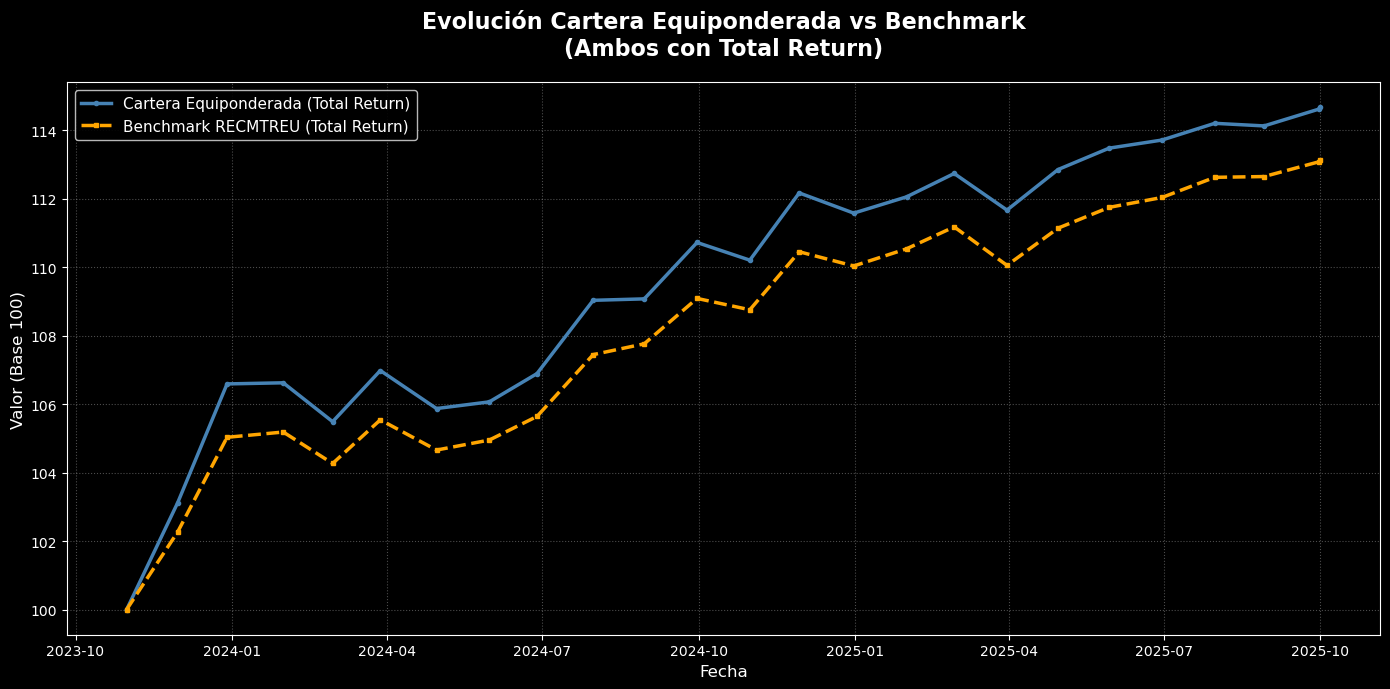

In [77]:
# ============================================================================
# BACKTEST CARTERA EQUIPONDERADA CON TOTAL RETURN
# ============================================================================

import numpy as np
import pandas as pd
from datetime import timedelta

# Usar el DataFrame de universo cargado anteriormente
universo = df.copy()

# ----------------------------------------------------------------------------
# 0. FUNCION AUXILIAR PARA PARSEAR FECHAS
# ----------------------------------------------------------------------------
# 0. FUNCIÓN AUXILIAR PARA PARSEAR FECHAS
# ----------------------------------------------------------------------------
def _parsear_fecha(fecha_str):
    """
    Convierte una fecha en formato string a datetime.
    Intenta varios formatos comunes.
    """
    if fecha_str is None or (isinstance(fecha_str, str) and not fecha_str.strip()):
        return None
    
    if isinstance(fecha_str, pd.Timestamp):
        return fecha_str
    
    if isinstance(fecha_str, str):
        formatos = ['%d/%m/%Y', '%d/%m/%y', '%Y-%m-%d', '%d-%m-%Y']
        for fmt in formatos:
            try:
                return pd.to_datetime(fecha_str, format=fmt)
            except:
                continue
    
    try:
        return pd.to_datetime(fecha_str)
    except:
        return None

# ----------------------------------------------------------------------------
# 1. FUNCIÓN PARA GENERAR FECHAS DE CUPÓN
# ----------------------------------------------------------------------------

def generar_fechas_cupon(bono_caracteristicas, fecha_inicio, fecha_fin):
    """
    Genera las fechas de pago de cupón de un bono entre dos fechas.
    
    Args:
        bono_caracteristicas: Diccionario con las características del bono
        fecha_inicio: Fecha inicial del período (exclusivo)
        fecha_fin: Fecha final del período (inclusivo)
    
    Returns:
        Lista de fechas de cupón que caen en el período
    """
    
    coupon_freq = int(bono_caracteristicas.get('Coupon Frequency', 0))
    if coupon_freq == 0:
        return []
    
    callable_flag = bono_caracteristicas.get('Callable', 'N')
    maturity = bono_caracteristicas.get('Maturity')
    fecha_vencimiento = _parsear_fecha(maturity)
    
    # Bono perpetuo: usar próxima fecha call como vencimiento
    if fecha_vencimiento is None or (isinstance(maturity, str) and not maturity.strip()):
        next_call_date = bono_caracteristicas.get('Next Call Date')
        if callable_flag == 'Y' and next_call_date:
            fecha_vencimiento = _parsear_fecha(next_call_date)
        else:
            return []
    
    # Si es callable, usar fecha call si es anterior al vencimiento
    if callable_flag == 'Y':
        next_call_date = bono_caracteristicas.get('Next Call Date')
        if next_call_date:
            fecha_call = _parsear_fecha(next_call_date)
            if fecha_call and fecha_call < fecha_vencimiento:
                fecha_vencimiento = fecha_call
    
    # Generar fechas de cupón
    fecha_primer_cupon = _parsear_fecha(bono_caracteristicas.get('First Coupon Date')) or fecha_vencimiento
    
    meses_por_periodo = {1: 12, 2: 6, 4: 3, 12: 1}.get(coupon_freq)
    if meses_por_periodo:
        periodo = pd.DateOffset(months=meses_por_periodo)
    else:
        periodo = timedelta(days=int(365 / coupon_freq))
    
    fechas_cupon = []
    fecha_actual = fecha_primer_cupon
    while fecha_actual <= fecha_vencimiento:
        fechas_cupon.append(fecha_actual)
        fecha_actual += periodo
        if fecha_actual > fecha_vencimiento:
            break
    
    # Asegurar que el vencimiento está incluido
    if fechas_cupon and fechas_cupon[-1] != fecha_vencimiento:
        fechas_cupon[-1] = fecha_vencimiento
    
    # Filtrar solo las fechas que caen en el período de interés
    fechas_en_periodo = [f for f in fechas_cupon if fecha_inicio < f <= fecha_fin]
    
    return fechas_en_periodo

# ----------------------------------------------------------------------------
# 2. PREPARACIÓN DE DATOS
# ----------------------------------------------------------------------------

# Copiar y preparar precios de bonos
precios_bonos = df_precios_universo.set_index('ISIN').copy()
precios_bonos.index.name = None
precios_bonos.columns = pd.to_datetime(precios_bonos.columns, format='%d/%m/%Y', errors='coerce')
precios_bonos = precios_bonos.sort_index(axis=1)
precios_bonos = precios_bonos.T

# Convertir a numérico para evitar errores de tipo
for col in precios_bonos.columns:
    precios_bonos[col] = pd.to_numeric(precios_bonos[col], errors='coerce')

# Preparar benchmark (RECMTREU es un índice Total Return)
benchmark_series = df_precios_varios.set_index('Unnamed: 0')['RECMTREU Index'].copy()
benchmark_series.index = pd.to_datetime(benchmark_series.index, format='%d/%m/%Y')
benchmark_series = benchmark_series.sort_index()
benchmark_series = pd.to_numeric(benchmark_series, errors='coerce')
benchmark_series = benchmark_series.sort_index()
benchmark_series = pd.to_numeric(benchmark_series, errors='coerce')

# ----------------------------------------------------------------------------
# 3. ALINEAR FECHAS ENTRE CARTERA Y BENCHMARK
# ----------------------------------------------------------------------------

# Encontrar el rango de fechas común
fecha_inicio_comun = max(precios_bonos.index.min(), benchmark_series.index.min())
fecha_fin_comun = min(precios_bonos.index.max(), benchmark_series.index.max())

# Filtrar ambos DataFrames al rango común
precios_bonos = precios_bonos[(precios_bonos.index >= fecha_inicio_comun) &
                               (precios_bonos.index <= fecha_fin_comun)]
benchmark_series = benchmark_series[(benchmark_series.index >= fecha_inicio_comun) &
                                     (benchmark_series.index <= fecha_fin_comun)]

print(f'Rango de fechas común: {fecha_inicio_comun.strftime("%d/%m/%Y")} - {fecha_fin_comun.strftime("%d/%m/%Y")}')
print(f'Fechas en precios_bonos: {len(precios_bonos)}')
print(f'Fechas en benchmark: {len(benchmark_series)}')

# ----------------------------------------------------------------------------
# 4. GENERAR FECHAS DE REBALANCEO MENSUAL
# ----------------------------------------------------------------------------

# Obtener últimos días de cada mes
fechas_mensuales = precios_bonos.index.to_series().resample('ME').last().index
fechas_rebalanceo = []

for fecha in fechas_mensuales:
    # Buscar fechas disponibles en ambas series
    disponibles_bonos = precios_bonos.index[precios_bonos.index <= fecha]
    disponibles_benchmark = benchmark_series.index[benchmark_series.index <= fecha]
    
    if not disponibles_bonos.empty and not disponibles_benchmark.empty:
        fecha_bonos = disponibles_bonos[-1]
        fecha_benchmark = disponibles_benchmark[-1]
        
        # Usar la fecha que esté disponible en ambas series
        if fecha_bonos in benchmark_series.index:
            fechas_rebalanceo.append(fecha_bonos)
        elif fecha_benchmark in precios_bonos.index:
            fechas_rebalanceo.append(fecha_benchmark)
            
fechas_rebalanceo = sorted(list(set(fechas_rebalanceo)))
print(f'\nTotal de fechas de rebalanceo: {len(fechas_rebalanceo)}')

# ----------------------------------------------------------------------------
# 5. CREAR DICCIONARIO DE BONOS PARA ACCESO RÁPIDO
# ----------------------------------------------------------------------------

bonos_dict = {}
for _, bono in universo.iterrows():
    isin = bono['ISIN']
    bonos_dict[isin] = bono.to_dict()

# ----------------------------------------------------------------------------
# 6. EJECUTAR BACKTEST
# ----------------------------------------------------------------------------

capital_inicial = 100
valor_cartera = [capital_inicial]
fechas_cartera = [fechas_rebalanceo[0]]

print(f'\nIniciando backtest con Total Return (precio + cupones)...')
print(f'Periodos de rebalanceo: {len(fechas_rebalanceo)-1}')

for i in range(len(fechas_rebalanceo) - 1):
    fecha_inicio = fechas_rebalanceo[i]
    fecha_fin = fechas_rebalanceo[i+1]
    
    # Precios actuales y futuros
    precios_t0 = precios_bonos.loc[fecha_inicio].dropna()
    precios_t1 = precios_bonos.loc[fecha_fin]
    
    # Bonos vivos (disponibles en ambas fechas)
    bonos_cartera = precios_t0.index.intersection(precios_t1.dropna().index)
    
    if len(bonos_cartera) > 0:
        retornos_totales = []
        
        for isin in bonos_cartera:
            p0 = precios_t0[isin]
            p1 = precios_t1[isin]
            
            # Calcular cupones recibidos en el período
            cupones_recibidos = 0
            
            # Extraer el ISIN sin el sufijo ' Corp'
            isin_limpio = isin.replace(' Corp', '')
            
            if isin_limpio in bonos_dict:
                bono_info = bonos_dict[isin_limpio]
                fechas_cupon_periodo = generar_fechas_cupon(bono_info, fecha_inicio, fecha_fin)
                
                if fechas_cupon_periodo:
                    coupon_rate = float(bono_info.get('Coupon', 0))
                    coupon_freq = int(bono_info.get('Coupon Frequency', 1))
                    
                    # Cada fecha de cupón representa un pago
                    # Cupón anual / frecuencia = cupón por pago
                    cupon_por_pago = (coupon_rate / 100) * 100 / coupon_freq
                    cupones_recibidos = len(fechas_cupon_periodo) * cupon_por_pago
            
            # Retorno total = (precio_final - precio_inicial + cupones) / precio_inicial
            retorno_total = ((p1 - p0) + cupones_recibidos) / p0
            retornos_totales.append(retorno_total)
        
        # Retorno promedio de la cartera equiponderada
        retorno_promedio = np.mean(retornos_totales) if retornos_totales else 0.0
    else:
        retorno_promedio = 0.0
        
    # Actualizar valor de la cartera
    nuevo_valor = valor_cartera[-1] * (1 + retorno_promedio)
    valor_cartera.append(nuevo_valor)
    fechas_cartera.append(fecha_fin)

# Crear serie temporal de la cartera
serie_cartera = pd.Series(valor_cartera, index=fechas_cartera)

# ----------------------------------------------------------------------------
# 7. PREPARAR BENCHMARK PARA COMPARACIÓN
# ----------------------------------------------------------------------------

benchmark_cut = benchmark_series.loc[benchmark_series.index.isin(fechas_cartera)]

# Si faltan fechas en el benchmark, rellenar con el último valor disponible
if len(benchmark_cut) < len(fechas_cartera):
    benchmark_completo = pd.Series(index=fechas_cartera, dtype=float)
    
    for fecha in fechas_cartera:
        if fecha in benchmark_series.index:
            benchmark_completo[fecha] = benchmark_series[fecha]
        else:
            fechas_anteriores = benchmark_series.index[benchmark_series.index < fecha]
            if len(fechas_anteriores) > 0:
                fecha_anterior = fechas_anteriores[-1]
                benchmark_completo[fecha] = benchmark_series[fecha_anterior]
    
    benchmark_cut = benchmark_completo

# Normalizar benchmark a base 100
benchmark_base100 = benchmark_cut / benchmark_cut.iloc[0] * 100

# ----------------------------------------------------------------------------
# 8. CALCULAR MÉTRICAS DE RENDIMIENTO
# ----------------------------------------------------------------------------

retorno_total_cartera = (serie_cartera.iloc[-1] / serie_cartera.iloc[0]) - 1
retorno_total_benchmark = (benchmark_base100.iloc[-1] / benchmark_base100.iloc[0]) - 1

print(f'\n{"="*60}')
print('RESULTADOS DEL BACKTEST')
print("="*60)
print(f'Retorno Total Cartera (Total Return): {retorno_total_cartera:.2%}')
print(f'Retorno Total Benchmark (Total Return): {retorno_total_benchmark:.2%}')
print(f'Diferencia (Alpha): {(retorno_total_cartera - retorno_total_benchmark):.2%}')
print("="*60)

# ----------------------------------------------------------------------------
# 9. VISUALIZACIÓN
# ----------------------------------------------------------------------------

plt.figure(figsize=(14, 7))
plt.plot(serie_cartera, label='Cartera Equiponderada (Total Return)', 
         linewidth=2.5, color='steelblue', marker='o', markersize=3)
plt.plot(benchmark_base100, label='Benchmark RECMTREU (Total Return)', 
         linewidth=2.5, linestyle='--', color='orange', marker='s', markersize=3)
plt.title('Evolución Cartera Equiponderada vs Benchmark\n(Ambos con Total Return)', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Valor (Base 100)', fontsize=12)
plt.xlabel('Fecha', fontsize=12)
plt.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)
plt.legend(fontsize=11, loc='best', framealpha=0.9)
plt.tight_layout()
plt.show()

In [78]:
# ============================================================================
# RESPUESTAS A LAS PREGUNTAS
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS Y REFLEXIONES")
print("="*80)

print("\n📌 ¿Qué sería lo más correcto en lugar de utilizar los precios MID?")
print("-" * 80)
print("""
Lo más correcto sería utilizar:
- Precios BID para las valoraciones de SALIDA (cuando vendemos el bono)
- Precios ASK para las valoraciones de ENTRADA (cuando compramos el bono)

Esto incorporaría los costes de transacción implícitos (bid-ask spread) y 
reflejaría de manera más realista los costes de trading. El spread bid-ask
es un coste oculto pero real que afecta significativamente al rendimiento,
especialmente en bonos menos líquidos.

En el contexto de este backtest:
- Al REBALANCEAR (comprar nuevos bonos): usar precio ASK
- Al VALORAR la cartera (calcular retornos): usar precio BID
- Esto reduciría el retorno total de la cartera y sería más conservador
""" )

print("\n📌 ¿Se te ocurre algún otro benchmark que se podría utilizar?")
print("-" * 80)
print("""
Benchmarks alternativos que podrían ser más apropiados:

1. ÍNDICE CON FILTRO DE LIQUIDEZ:
   - Un índice de bonos corporativos que solo contenga bonos líquidos
   - Criterio: volumen de negociación mínimo diario/semanal
   - Ventaja: Los precios reflejan transacciones reales, no valoraciones teóricas
   
2. ÍNDICE SECTORIAL ESPECÍFICO:
   - Si nuestra cartera tiene concentración sectorial
   - Ejemplo: Índice de bonos financieros europeos
   
3. ÍNDICE CON FILTRO DE RATING:
   - Si nuestra cartera tiene un sesgo hacia Investment Grade o High Yield
   - Ejemplo: iBoxx EUR Corporates IG o HY
   
4. BENCHMARK PERSONALIZADO:
   - Combinación ponderada de varios índices
   - Ejemplo: 70% IG + 30% HY según composición de cartera
   
5. CASH + MARGEN (Hurdle Rate):
   - ESTR (€STR) + spread objetivo (ej. +200 bps)
   - Útil para evaluar si la estrategia genera valor real

La elección depende de:
- Objetivo de inversión
- Perfil de riesgo de la cartera
- Horizonte temporal
- Liquidez requerida
""")

print("\n" + "="*80)


ANÁLISIS Y REFLEXIONES

📌 ¿Qué sería lo más correcto en lugar de utilizar los precios MID?
--------------------------------------------------------------------------------

Lo más correcto sería utilizar:
- Precios BID para las valoraciones de SALIDA (cuando vendemos el bono)
- Precios ASK para las valoraciones de ENTRADA (cuando compramos el bono)

Esto incorporaría los costes de transacción implícitos (bid-ask spread) y 
reflejaría de manera más realista los costes de trading. El spread bid-ask
es un coste oculto pero real que afecta significativamente al rendimiento,
especialmente en bonos menos líquidos.

En el contexto de este backtest:
- Al REBALANCEAR (comprar nuevos bonos): usar precio ASK
- Al VALORAR la cartera (calcular retornos): usar precio BID
- Esto reduciría el retorno total de la cartera y sería más conservador


📌 ¿Se te ocurre algún otro benchmark que se podría utilizar?
--------------------------------------------------------------------------------

Benchmarks alt

### <font color=#336699>6. Cartera mandato</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Como adelantábamos en el enunciado, tienes el mandato de construir una cartera de como máximo **20** bonos corporativos con ese universo y una serie de restricciones y, claro, maximizando la rentabilidad total de la cartera:
- La duración de la cartera no debe superar los 3 años
- La exposición a emisiones HY no puede superar el 10% de la cartera
- No puedes invertir en deuda subordinada
- No se puede invertir en emisiones de tamaño igual o inferior a 500 millones
- No se puede invertir más de un 10% del capital en una misma emisión
- No puede haber más de un 15% de concentración en un mismo emisor
(¡OJO! No estamos teniendo en cuenta en este ejercicio si hubiera un mínimo de inversión, lo cuál sería un dato relevante tener en cuenta en un caso real)

1. Teniendo en cuenta la naturaleza que nos están pidiendo para la cartera, ¿añadirías alguna otra restricción?

2. ¿Cómo medirías el riesgo de crédito de la cartera?

3. ¿Cómo medirías el riesgo de liquidez de la cartera? ¿Se te ocurre alguna otra información que se podría utilizar aunque no se te haya dado?

4. Describe cómo habría que hacer el backtest de esta cartera, no hace falta que lo implementes en este caso

</div>

In [79]:
# ============================================================================
# CONSTRUCCIÓN DE CARTERA ÓPTIMA - PROGRAMACIÓN LINEAL ENTERA MIXTA
# ============================================================================

# PASO 0: Instalar PuLP si no está instalado
import sys
import subprocess

try:
    import pulp
    print('✓ PuLP ya está instalado')
except ImportError:
    print('Instalando PuLP...')
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'pulp'])
    import pulp
    print('✓ PuLP instalado correctamente')

from pulp import *
import warnings
import re
warnings.filterwarnings('ignore')

print('='*80)
print('CONSTRUCCIÓN DE CARTERA ÓPTIMA CON MANDATO')
print('='*80)

# ----------------------------------------------------------------------------
# PASO 1: PREPARACIÓN DE DATOS
# ----------------------------------------------------------------------------

# Cargar datos de TIR y duración
# Primero intentar usar las variables en memoria (df_flujos)
# Si no existe, intentar cargar desde CSV

try:
    # Verificar si df_flujos existe en memoria con las columnas necesarias
    if 'df_flujos' in globals() and 'YTM' in df_flujos.columns and 'Duracion_Modificada' in df_flujos.columns:
        print('✓ Usando datos de TIR y duración desde df_flujos (en memoria)')
        # Preparar datos con renombre de columna YTM -> TIR
        df_ytm_duracion = df_flujos[['ISIN', 'YTM', 'Duracion_Modificada']].copy()
        df_ytm_duracion = df_ytm_duracion.rename(columns={'YTM': 'TIR'})
        # Convertir TIR de decimal a porcentaje (YTM está en decimal, TIR lo queremos en %)
        df_ytm_duracion['TIR'] = df_ytm_duracion['TIR'] * 100
    else:
        # Intentar cargar desde archivo CSV
        print('⚠ df_flujos no disponible en memoria, intentando cargar desde CSV...')
        df_ytm_duracion = pd.read_csv('../data/ytm_duracion_convexidad.csv', sep=';')
        print('✓ Datos de TIR y duración cargados desde CSV')
except Exception as e:
    print(f'\n❌ ERROR: No se pudieron cargar los datos de TIR y duración')
    print(f'  Error: {str(e)}')
    print(f'\n  Asegúrate de haber ejecutado las celdas anteriores del Punto 4 que calculan:')
    print(f'    - YTM (Yield to Maturity)')
    print(f'    - Duración Modificada')
    print(f'    - Convexidad')
    raise

# Merge con universo para tener toda la información
universo_completo = universo.merge(
    df_ytm_duracion[['ISIN', 'TIR', 'Duracion_Modificada']],
    on='ISIN',
    how='left'
)

print(f'✓ Merge completado: {len(universo_completo)} bonos en universo_completo')
print(f'  - Bonos con TIR: {universo_completo["TIR"].notna().sum()}')
print(f'  - Bonos con Duración: {universo_completo["Duracion_Modificada"].notna().sum()}')

# ----------------------------------------------------------------------------
# PASO 2: APLICAR RESTRICCIONES DURAS (FILTRADO PREVIO)
# ----------------------------------------------------------------------------

print(f'\n{"="*80}')
print('FILTRADO INICIAL - RESTRICCIONES DURAS')
print('='*80)

# Filtro 1: Eliminar subordinados
universo_filtrado = universo_completo[
    ~universo_completo['Seniority'].isin(['Subordinated', 'Jr Subordinated'])
].copy()
print(f'✓ Después de eliminar subordinados: {len(universo_filtrado)} bonos')

# Filtro 2: Outstanding Amount > 500M
universo_filtrado = universo_filtrado[
    universo_filtrado['Outstanding Amount'] > 500_000_000
].copy()
print(f'✓ Después de filtrar por tamaño (>500M): {len(universo_filtrado)} bonos')

# Filtro 3: Eliminar bonos sin TIR o duración
universo_filtrado = universo_filtrado[
    universo_filtrado['TIR'].notna() &
    universo_filtrado['Duracion_Modificada'].notna()
].copy()
print(f'✓ Después de eliminar bonos sin TIR/Duración: {len(universo_filtrado)} bonos')

# Clasificar HY vs IG
hy_ratings = ['BB+', 'BB', 'BB-', 'B+', 'B', 'B-', 'CCC', 'CC', 'C', 'D', 'NR']
universo_filtrado['Es_HY'] = (
    universo_filtrado['Rating'].isna() |
    (universo_filtrado['Rating'] == 'NR') |
    universo_filtrado['Rating'].isin(hy_ratings)
)

print(f'\nClasificación crediticia:')
print(f'  - Bonos HY: {universo_filtrado["Es_HY"].sum()}')
print(f'  - Bonos IG: {(~universo_filtrado["Es_HY"]).sum()}')

# ----------------------------------------------------------------------------
# PASO 3: OPTIMIZACIÓN CON PROGRAMACIÓN LINEAL ENTERA MIXTA
# ----------------------------------------------------------------------------

print(f'\n{"="*80}')
print('OPTIMIZACIÓN - PROGRAMACIÓN LINEAL ENTERA MIXTA')
print('='*80)

# Resetear índice para facilitar acceso
universo_filtrado = universo_filtrado.reset_index(drop=True)
n_bonos = len(universo_filtrado)

print(f'\nFormulando problema de optimización...')
print(f'Variables de decisión: {n_bonos} bonos candidatos')

# Crear mapeo de índice a ISIN
isin_map = {i: universo_filtrado.loc[i, 'ISIN'] for i in range(n_bonos)}

# Función para limpiar nombres de restricciones
def clean_name(name):
    return re.sub(r'[^a-zA-Z0-9_]', '_', name)

# Crear el problema de optimización
prob = LpProblem("Portfolio_Optimization", LpMaximize)

# Variables de decisión:
# x[i]: variable binaria (0 o 1) - si el bono i está en la cartera
# w[i]: variable continua [0, 0.10] - peso del bono i en la cartera
x = {i: LpVariable(f"x_{clean_name(isin_map[i])}", cat='Binary') for i in range(n_bonos)}
w = {i: LpVariable(f"w_{clean_name(isin_map[i])}", lowBound=0, upBound=0.10) for i in range(n_bonos)}

# FUNCIÓN OBJETIVO: Maximizar TIR promedio ponderada
prob += lpSum([w[i] * universo_filtrado.loc[i, 'TIR'] for i in range(n_bonos)]), "TIR_Objetivo"

# ----------------------------------------------------------------------------
# PASO 4: AÑADIR RESTRICCIONES
# ----------------------------------------------------------------------------

print(f'\nAñadiendo restricciones del mandato:')

# Restricción 1: Los pesos deben sumar 1 (100%)
prob += lpSum([w[i] for i in range(n_bonos)]) == 1, "Suma_Pesos"
print('  ✓ Suma de pesos = 100%')

# Restricción 2: Máximo 20 bonos en la cartera
prob += lpSum([x[i] for i in range(n_bonos)]) <= 20, "Max_20_Bonos"
print('  ✓ Máximo 20 bonos')

# Restricción 3: Si un bono no está seleccionado (xi=0), su peso debe ser 0
# Si está seleccionado (xi=1), debe tener al menos 0.1% (peso mínimo realista)
for i in range(n_bonos):
    prob += w[i] <= x[i] * 0.10, f"Link_Max_{clean_name(isin_map[i])}"
    prob += w[i] >= x[i] * 0.001, f"Link_Min_{clean_name(isin_map[i])}"
print('  ✓ Linkage entre selección y peso')

# Restricción 4: Duración de la cartera ≤ 3 años
prob += lpSum([w[i] * universo_filtrado.loc[i, 'Duracion_Modificada']
               for i in range(n_bonos)]) <= 3.0, "Duracion_Max"
print('  ✓ Duración ≤ 3 años')

# Restricción 5: Exposición a HY ≤ 10%
prob += lpSum([w[i] * (1 if universo_filtrado.loc[i, 'Es_HY'] else 0)
               for i in range(n_bonos)]) <= 0.10, "HY_Max"
print('  ✓ Exposición HY ≤ 10%')

# Restricción 6: Peso máximo por emisión: 10% (ya incluido en definición de w)
print('  ✓ Peso por emisión ≤ 10%')

# Restricción 7: Concentración por emisor ≤ 15%
emisores_unicos = universo_filtrado['Issuer'].unique()
for emisor in emisores_unicos:
    indices_emisor = universo_filtrado[universo_filtrado['Issuer'] == emisor].index.tolist()
    if len(indices_emisor) > 0:
        primer_isin = universo_filtrado.loc[indices_emisor[0], 'ISIN']
        prob += lpSum([w[i] for i in indices_emisor]) <= 0.15, f"Emisor_{clean_name(primer_isin)}"
print(f'  ✓ Concentración por emisor ≤ 15% ({len(emisores_unicos)} emisores)')

# ----------------------------------------------------------------------------
# PASO 5: RESOLVER EL PROBLEMA
# ----------------------------------------------------------------------------

print(f'\n{"="*80}')
print('RESOLVIENDO PROBLEMA DE OPTIMIZACIÓN...')
print('='*80)
print('(Esto puede tardar unos segundos)')

# Resolver el problema (msg=0 para no mostrar output del solver)
prob.solve(PULP_CBC_CMD(msg=0))

# Verificar estado de la solución
print(f'\nEstado: {LpStatus[prob.status]}')

# ----------------------------------------------------------------------------
# PASO 6: EXTRAER Y ANALIZAR RESULTADOS
# ----------------------------------------------------------------------------

if prob.status == 1:  # Óptimo encontrado
    print(f'✓ Solución óptima encontrada')
    print(f'\nTIR óptima de la cartera: {value(prob.objective):.4f}%')

    # Extraer solución
    bonos_seleccionados = []
    pesos_seleccionados = []

    for i in range(n_bonos):
        if x[i].varValue > 0.5:  # Bono seleccionado
            bonos_seleccionados.append(i)
            pesos_seleccionados.append(w[i].varValue)

    # Crear DataFrame de la cartera óptima
    cartera_optima = universo_filtrado.loc[bonos_seleccionados].copy()
    cartera_optima['Peso'] = pesos_seleccionados
    cartera_optima = cartera_optima.sort_values('TIR', ascending=False).reset_index(drop=True)

    # ----------------------------------------------------------------------------
    # RESULTADOS PRINCIPALES
    # ----------------------------------------------------------------------------

    print(f'\n{"="*80}')
    print('CARTERA ÓPTIMA - COMPOSICIÓN')
    print('='*80)
    print(f'\nBonos seleccionados: {len(cartera_optima)}')

    # Métricas de rentabilidad
    tir_cartera = (cartera_optima['TIR'] * cartera_optima['Peso']).sum()
    print(f'TIR promedio ponderada: {tir_cartera:.4f}%')

    # Métricas de duración
    duracion_cartera = (cartera_optima['Duracion_Modificada'] * cartera_optima['Peso']).sum()
    print(f'Duración de la cartera: {duracion_cartera:.4f} años')

    # Métricas de crédito
    num_hy = cartera_optima['Es_HY'].sum()
    peso_hy = (cartera_optima['Es_HY'] * cartera_optima['Peso']).sum()
    print(f'Bonos HY: {num_hy} bonos ({peso_hy:.2%} del capital)')

    # ----------------------------------------------------------------------------
    # VERIFICACIÓN DE RESTRICCIONES
    # ----------------------------------------------------------------------------

    print(f'\n{"="*80}')
    print('VERIFICACIÓN DE RESTRICCIONES')
    print('='*80)

    print(f'\n✓ Número de bonos: {len(cartera_optima)} ≤ 20')
    print(f'✓ Suma de pesos: {cartera_optima["Peso"].sum():.4f} = 1.0')
    print(f'✓ Duración: {duracion_cartera:.4f} ≤ 3.0 años')
    print(f'✓ Exposición HY: {peso_hy:.4f} ≤ 0.10')
    print(f'✓ Sin deuda subordinada: {cartera_optima["Seniority"].isin(["Subordinated", "Jr Subordinated"]).sum()} bonos')
    print(f'✓ Tamaño mínimo: {(cartera_optima["Outstanding Amount"] > 500_000_000).sum()} de {len(cartera_optima)} > 500M')
    print(f'✓ Peso máximo por emisión: {cartera_optima["Peso"].max():.4f} ≤ 0.10')

    concentracion_emisor = cartera_optima.groupby('Issuer')['Peso'].sum().sort_values(ascending=False)
    print(f'✓ Concentración máxima por emisor: {concentracion_emisor.max():.4f} ≤ 0.15')

    # ----------------------------------------------------------------------------
    # DETALLE DE LA COMPOSICIÓN
    # ----------------------------------------------------------------------------

    print(f'\n{"="*80}')
    print('DETALLE DE BONOS EN LA CARTERA (Ordenados por TIR)')
    print('='*80)
    print()

    display_cols = ['ISIN', 'Issuer', 'Rating', 'Es_HY', 'TIR',
                    'Duracion_Modificada', 'Outstanding Amount', 'Peso']
    print(cartera_optima[display_cols].to_string(index=False))

    # Concentración por emisor
    print(f'\n{"="*80}')
    print('CONCENTRACIÓN POR EMISOR')
    print('='*80)
    for emisor, peso in concentracion_emisor.items():
        num_bonos = len(cartera_optima[cartera_optima['Issuer'] == emisor])
        print(f'{emisor:40s}: {peso:6.2%} ({num_bonos} bonos)')

    # Mostrar bonos HY si los hay
    if num_hy > 0:
        print(f'\n{"="*80}')
        print(f'BONOS HIGH YIELD EN LA CARTERA ({num_hy} bonos)')
        print('='*80)
        bonos_hy = cartera_optima[cartera_optima['Es_HY']]
        for idx, bono in bonos_hy.iterrows():
            rating_display = bono['Rating'] if pd.notna(bono['Rating']) and bono['Rating'] != 'NR' else 'Sin Rating'
            print(f'{bono["ISIN"]} - {bono["Issuer"]:30s} - Rating: {rating_display:5s} - TIR: {bono["TIR"]:6.2f}% - Peso: {bono["Peso"]:6.2%}')

    # Guardar cartera
    try:
        cartera_optima.to_csv('../data/cartera_mandato.csv', index=False, sep=';')
        print(f'\n✓ Cartera guardada en: ../data/cartera_mandato.csv')
    except:
        print(f'\n⚠ No se pudo guardar la cartera (verifica la ruta)')

    # Guardar en variable global para usar en celdas siguientes
    globals()['cartera_mandato'] = cartera_optima

else:
    print(f'\n✗ No se encontró solución óptima')
    print(f'Estado: {LpStatus[prob.status]}')
    print('\nPosibles razones:')
    print('- Las restricciones son incompatibles (infeasible)')
    print('- El problema es unbounded')
    print('- Necesitas revisar los datos de entrada')


✓ PuLP ya está instalado
CONSTRUCCIÓN DE CARTERA ÓPTIMA CON MANDATO
✓ Usando datos de TIR y duración desde df_flujos (en memoria)
✓ Merge completado: 2255 bonos en universo_completo
  - Bonos con TIR: 2255
  - Bonos con Duración: 2255

FILTRADO INICIAL - RESTRICCIONES DURAS
✓ Después de eliminar subordinados: 2077 bonos
✓ Después de filtrar por tamaño (>500M): 1353 bonos
✓ Después de eliminar bonos sin TIR/Duración: 1353 bonos

Clasificación crediticia:
  - Bonos HY: 154
  - Bonos IG: 1199

OPTIMIZACIÓN - PROGRAMACIÓN LINEAL ENTERA MIXTA

Formulando problema de optimización...
Variables de decisión: 1353 bonos candidatos

Añadiendo restricciones del mandato:
  ✓ Suma de pesos = 100%
  ✓ Máximo 20 bonos
  ✓ Linkage entre selección y peso
  ✓ Duración ≤ 3 años
  ✓ Exposición HY ≤ 10%
  ✓ Peso por emisión ≤ 10%
  ✓ Concentración por emisor ≤ 15% (397 emisores)

RESOLVIENDO PROBLEMA DE OPTIMIZACIÓN...
(Esto puede tardar unos segundos)
  ✓ Concentración por emisor ≤ 15% (397 emisores)

RESO

##### <font color=#CC6600>Riesgo de crédito</font>

In [80]:
# ============================================================================
# ANÁLISIS DE RIESGO DE CRÉDITO DE LA CARTERA
# ============================================================================

print('='*80)
print('ANÁLISIS DE RIESGO DE CRÉDITO')
print('='*80)

# Verificar que tenemos la cartera
if 'cartera_mandato' not in globals():
    print('⚠ Primero debes ejecutar la celda de construcción de cartera')
else:
    cartera = cartera_mandato.copy()
    
    # ------------------------------------------------------------------------
    # 1. PREGUNTA CONCEPTUAL: ¿Cómo medirías el riesgo de crédito?
    # ------------------------------------------------------------------------
    
    print('\n📌 ¿CÓMO MEDIR EL RIESGO DE CRÉDITO DE LA CARTERA?')
    print('-'*80)
    print('''
MÉTRICAS CUANTITATIVAS:

1. RATING PROMEDIO PONDERADO
   - Convertir ratings a escala numérica (AAA=1, AA=2, ..., D=10)
   - Calcular promedio ponderado por peso en cartera
   - Interpretación: Rating "efectivo" de la cartera

2. PROBABILIDAD DE DEFAULT (PD)
   - Usar matrices de transición de agencias (Moody\'s, S&P, Fitch)
   - PD histórica por rating: AAA=0.02%, BBB=0.3%, BB=1.5%, B=7%
   - PD de cartera = Σ (Peso_i × PD_i)

3. CREDIT SPREAD ANALYSIS
   - Dispersión de spreads sobre curva libre de riesgo (€STR)
   - Spread promedio ponderado
   - Volatilidad de spreads (proxy de incertidumbre crediticia)

4. DURATION TIMES SPREAD (DTS)
   - DTS_i = Duración_i × Spread_i
   - Sensibilidad al ensanchamiento de spreads
   - DTS cartera = Σ (Peso_i × DTS_i)

5. CREDIT VAR (Value at Risk)
   - Pérdida máxima esperada con X% confianza (95%, 99%)
   - Métodos: Histórico, Monte Carlo, CreditMetrics
   - Incorpora correlaciones entre defaults

6. EXPECTED LOSS (EL)
   - EL = PD × LGD × EAD
   - PD: Probabilidad de default
   - LGD: Loss Given Default (típicamente 40-60% para senior)
   - EAD: Exposure at Default

MÉTRICAS CUALITATIVAS:

7. CONCENTRACIÓN POR RATING
   - ¿Cuánto peso en cada categoría de rating?
   - ¿Hay excesiva concentración en ratings bajos (BBB-, BB)?

8. CONCENTRACIÓN SECTORIAL
   - Sectores correlacionados → riesgo sistémico
   - Ejemplo: Crisis financiera 2008 → bancos correlacionados

9. ANÁLISIS DE COVENANTS
   - ¿Qué protecciones contractuales tenemos?
   - Change of control, negative pledge, cross-default

10. POSICIÓN EN ESTRUCTURA DE CAPITAL
    - Senior Secured > Senior Unsecured > Subordinated
    - Tasa de recuperación histórica en defaults

HERRAMIENTAS PRÁCTICAS:

- CDS Spreads: Mercado de credit default swaps como proxy
- Índices de crédito: Comparar con iTraxx Main, iTraxx Crossover
- Stress Testing: ¿Qué pasa si X empresa es downgradeada?
    ''')
    
    # ------------------------------------------------------------------------
    # 2. IMPLEMENTACIÓN: Métricas calculables con datos disponibles
    # ------------------------------------------------------------------------
    
    print('\n' + '='*80)
    print('ANÁLISIS CUANTITATIVO DE RIESGO DE CRÉDITO')
    print('='*80)
    
    # 2.1. Rating Promedio Ponderado
    print('\n1. RATING PROMEDIO PONDERADO')
    print('-'*80)
    
    # Mapeo de ratings a escala numérica
    rating_scores = {
        'AAA': 1, 'AA+': 2, 'AA': 3, 'AA-': 4,
        'A+': 5, 'A': 6, 'A-': 7,
        'BBB+': 8, 'BBB': 9, 'BBB-': 10,
        'BB+': 11, 'BB': 12, 'BB-': 13,
        'B+': 14, 'B': 15, 'B-': 16,
        'CCC': 17, 'CC': 18, 'C': 19, 'D': 20,
        'NR': 15  # Sin rating asumimos riesgo medio-alto
    }
    
    cartera['Rating_Score'] = cartera['Rating'].map(rating_scores)
    cartera['Rating_Score'] = cartera['Rating_Score'].fillna(15)  # NaN → 15
    
    rating_promedio = (cartera['Rating_Score'] * cartera['Peso']).sum()
    
    # Mapeo inverso para interpretar
    rating_interpretacion = {
        range(1, 4): 'AA (Muy Alta Calidad)',
        range(4, 8): 'A (Alta Calidad)',
        range(8, 11): 'BBB (Investment Grade medio)',
        range(11, 14): 'BB (High Yield alto)',
        range(14, 17): 'B (High Yield medio-bajo)',
        range(17, 21): 'CCC o inferior (Alto Riesgo)'
    }
    
    interpretacion = 'BBB (Investment Grade)'
    for rango, desc in rating_interpretacion.items():
        if int(rating_promedio) in rango:
            interpretacion = desc
            break
    
    print(f'Rating Promedio Ponderado: {rating_promedio:.2f}')
    print(f'Interpretación: {interpretacion}')
    
    # 2.2. Distribución por Rating
    print('\n2. DISTRIBUCIÓN POR CATEGORÍA DE RATING')
    print('-'*80)
    
    # Agrupar ratings en categorías amplias
    def categorizar_rating(rating):
        if pd.isna(rating) or rating == 'NR':
            return 'Sin Rating'
        elif rating in ['AAA', 'AA+', 'AA', 'AA-']:
            return 'AA'
        elif rating in ['A+', 'A', 'A-']:
            return 'A'
        elif rating in ['BBB+', 'BBB', 'BBB-']:
            return 'BBB'
        elif rating in ['BB+', 'BB', 'BB-']:
            return 'BB'
        elif rating in ['B+', 'B', 'B-']:
            return 'B'
        else:
            return 'CCC o inferior'
    
    cartera['Rating_Categoria'] = cartera['Rating'].apply(categorizar_rating)
    distribucion_rating = cartera.groupby('Rating_Categoria')['Peso'].sum().sort_values(ascending=False)
    
    for categoria, peso in distribucion_rating.items():
        num_bonos = len(cartera[cartera['Rating_Categoria'] == categoria])
        print(f'{categoria:15s}: {peso:6.2%} ({num_bonos} bonos)')
    
    # 2.3. Concentración Sectorial (si disponible)
    print('\n3. CONCENTRACIÓN SECTORIAL')
    print('-'*80)
    
    if 'Sector' in cartera.columns:
        concentracion_sector = cartera.groupby('Sector')['Peso'].sum().sort_values(ascending=False)
        for sector, peso in concentracion_sector.items():
            num_bonos = len(cartera[cartera['Sector'] == sector])
            print(f'{sector:30s}: {peso:6.2%} ({num_bonos} bonos)')
    else:
        print('⚠ No hay información sectorial disponible')
        print('  Recomendación: Añadir columna "Sector" para análisis más completo')
    
    # 2.4. Seniority Distribution
    print('\n4. DISTRIBUCIÓN POR PRELACIÓN (SENIORITY)')
    print('-'*80)
    
    distribucion_seniority = cartera.groupby('Seniority')['Peso'].sum().sort_values(ascending=False)
    for seniority, peso in distribucion_seniority.items():
        num_bonos = len(cartera[cartera['Seniority'] == seniority])
        print(f'{seniority:30s}: {peso:6.2%} ({num_bonos} bonos)')
    
    print('\nInterpretación:')
    print('- Senior Secured: Máxima protección (primera en cobrar en default)')
    print('- Senior Unsecured: Protección estándar')
    print('- Subordinated: Mayor riesgo (cobra después de senior)')
    
    # 2.5. Duration Times Spread (si tenemos spreads)
    print('\n5. SENSIBILIDAD A SPREADS DE CRÉDITO')
    print('-'*80)
    
    duracion_cartera = (cartera['Duracion_Modificada'] * cartera['Peso']).sum()
    print(f'Duración Modificada de la Cartera: {duracion_cartera:.4f} años')
    print('\nInterpretación:')
    print(f'- Si los spreads de crédito aumentan 100 bps (1%), la cartera perdería aprox. {duracion_cartera:.2f}%')
    print(f'- Si los spreads se reducen 50 bps, la cartera ganaría aprox. {duracion_cartera/2:.2f}%')
    
    # 2.6. Resumen de Riesgos
    print('\n' + '='*80)
    print('RESUMEN DE RIESGOS DE CRÉDITO')
    print('='*80)
    
    print(f'''
✓ Calidad Crediticia: {interpretacion}
✓ Exposición HY: {(cartera["Es_HY"] * cartera["Peso"]).sum():.2%} (límite: 10%)
✓ Diversificación: {len(cartera)} bonos de {len(cartera["Issuer"].unique())} emisores
✓ Concentración máxima por emisor: {cartera.groupby("Issuer")["Peso"].sum().max():.2%}
✓ Prelación: {(cartera["Seniority"] == "Senior Unsecured").sum()} senior unsecured, {(cartera["Seniority"] == "Senior Secured").sum()} senior secured

⚠ RIESGOS IDENTIFICADOS:
''')
    
    # Identificar riesgos específicos
    peso_hy = (cartera['Es_HY'] * cartera['Peso']).sum()
    if peso_hy > 0.05:
        print(f'  - Exposición HY de {peso_hy:.2%}: Mayor riesgo de default')
    
    if rating_promedio > 10:
        print(f'  - Rating promedio en zona BBB-/BB+: Riesgo de downgrade a HY')
    
    concentracion_max = cartera.groupby('Issuer')['Peso'].sum().max()
    if concentracion_max > 0.10:
        print(f'  - Alta concentración en un emisor ({concentracion_max:.2%}): Riesgo idiosincrático')
    
    if 'Sector' in cartera.columns:
        concentracion_sector_max = cartera.groupby('Sector')['Peso'].sum().max()
        if concentracion_sector_max > 0.30:
            print(f'  - Alta concentración sectorial ({concentracion_sector_max:.2%}): Riesgo sistémico')
    
    print('\n' + '='*80)

ANÁLISIS DE RIESGO DE CRÉDITO

📌 ¿CÓMO MEDIR EL RIESGO DE CRÉDITO DE LA CARTERA?
--------------------------------------------------------------------------------

MÉTRICAS CUANTITATIVAS:

1. RATING PROMEDIO PONDERADO
   - Convertir ratings a escala numérica (AAA=1, AA=2, ..., D=10)
   - Calcular promedio ponderado por peso en cartera
   - Interpretación: Rating "efectivo" de la cartera

2. PROBABILIDAD DE DEFAULT (PD)
   - Usar matrices de transición de agencias (Moody's, S&P, Fitch)
   - PD histórica por rating: AAA=0.02%, BBB=0.3%, BB=1.5%, B=7%
   - PD de cartera = Σ (Peso_i × PD_i)

3. CREDIT SPREAD ANALYSIS
   - Dispersión de spreads sobre curva libre de riesgo (€STR)
   - Spread promedio ponderado
   - Volatilidad de spreads (proxy de incertidumbre crediticia)

4. DURATION TIMES SPREAD (DTS)
   - DTS_i = Duración_i × Spread_i
   - Sensibilidad al ensanchamiento de spreads
   - DTS cartera = Σ (Peso_i × DTS_i)

5. CREDIT VAR (Value at Risk)
   - Pérdida máxima esperada con X% conf

##### <font color=#CC6600>Riesgo de liquidez</font>

In [84]:
# ============================================================================
# ANÁLISIS DE RIESGO DE LIQUIDEZ DE LA CARTERA
# ============================================================================

print('='*80)
print('ANÁLISIS DE RIESGO DE LIQUIDEZ')
print('='*80)

# Verificar que tenemos la cartera
if 'cartera_mandato' not in globals():
    print('⚠ Primero debes ejecutar la celda de construcción de cartera')
else:
    cartera = cartera_mandato.copy()
    
    # ------------------------------------------------------------------------
    # 1. PREGUNTA CONCEPTUAL: ¿Cómo medirías el riesgo de liquidez?
    # ------------------------------------------------------------------------
    
    print('\n📌 ¿CÓMO MEDIR EL RIESGO DE LIQUIDEZ DE LA CARTERA?')
    print('-'*80)
    print('''
MÉTRICAS CON DATOS DISPONIBLES:

1. BID-ASK SPREAD
   - Diferencia entre precio de compra y venta
   - Mayor spread → menor liquidez → mayor coste de transacción
   - Típico en bonos corporativos: 10-50 bps (0.10%-0.50%)
   - HY o illiquid: puede superar 100 bps (1%)

2. OUTSTANDING AMOUNT (Tamaño de Emisión)
   - Emisiones grandes (>1B EUR) → más líquidas
   - Emisiones pequeñas (<500M EUR) → menos líquidas
   - Benchmark issues (>1.5B EUR) → máxima liquidez

3. TIME SINCE ISSUANCE
   - On-the-run (recién emitidos): Más líquidos
   - Off-the-run (antiguos): Menos líquidos
   - Regla general: liquidez disminuye después de 6-12 meses

INFORMACIÓN ADICIONAL ÚTIL (NO PROPORCIONADA):

4. VOLUMEN DE NEGOCIACIÓN
   - Volumen diario/semanal en EUR
   - Indicador directo de liquidez real
   - Ejemplo: ¿Se negocian 10M EUR al día o solo 100k?

5. TURNOVER RATIO
   - Ratio = Volumen negociado / Outstanding Amount
   - Ejemplo: 50% anual → se negocia la mitad de la emisión al año
   - Mayor turnover → mayor liquidez

6. TRADE FREQUENCY
   - ¿Cuántos días se negoció el bono en el último mes?
   - Daily trading: Alta liquidez
   - Weekly trading: Liquidez moderada
   - Monthly trading: Baja liquidez

7. NÚMERO DE MARKET MAKERS
   - Cuántos dealers cotizan el bono activamente
   - >5 market makers: Buena liquidez
   - <3 market makers: Liquidez limitada

8. BLOCK LIQUIDITY
   - ¿Puedo vender 10M EUR sin mover el precio?
   - Market impact: Δ Precio por cada 1M EUR negociado

9. TIME TO LIQUIDATE
   - ¿Cuántos días necesito para vender el 50% sin pérdidas?
   - Liquidez alta: 1-3 días
   - Liquidez media: 5-10 días
   - Liquidez baja: >2 semanas

ÍNDICES DE LIQUIDEZ COMPUESTOS:

10. AMIHUD ILLIQUIDITY RATIO
    - Ratio = |Retorno diario| / Volumen diario
    - Menor ratio → mayor liquidez
    - Usado en investigación académica

11. ROLL MEASURE
    - Covarianza de cambios de precio consecutivos
    - Negativa y grande → bounce entre bid/ask → illiquido

12. LOT SCORE (Liquidity Over Time)
    - Índice propietario basado en microestructura
    - Bloomberg LOT score: 1 (muy líquido) a 10 (muy ilíquido)

ESCENARIOS DE STRESS:

13. LIQUIDEZ EN CRISIS
    - ¿Qué pasó en marzo 2020 (COVID)?
    - Spreads de bonos corporativos se ensancharon 200-400 bps
    - Algunos bonos no cotizaron durante días

14. FIRE SALE SCENARIO
    - ¿Puedo liquidar 50% de la cartera en 5 días sin pérdida >5%?
    - Típico en redemptions de fondos

CONSIDERACIONES PRÁCTICAS:

15. CALLABLE BONDS
    - Bonos callable cerca de call date → menos líquidos
    - Incertidumbre sobre vida del bono

16. EDAD DEL BONO
    - Bonos cerca de vencimiento (<1 año) → menos líquidos
    - "Convexity drain" reduce interés de traders
    ''')
    
    # ------------------------------------------------------------------------
    # 2. IMPLEMENTACIÓN: Métricas calculables con datos disponibles
    # ------------------------------------------------------------------------
    
    print('\n' + '='*80)
    print('ANÁLISIS CUANTITATIVO DE RIESGO DE LIQUIDEZ')
    print('='*80)
    
    # 2.1. Análisis de Bid-Ask Spread
    print('\n1. ANÁLISIS DE BID-ASK SPREAD')
    print('-'*80)
    
    if 'Bid' in cartera.columns and 'Ask' in cartera.columns:
        cartera['Bid_Ask_Spread'] = cartera['Ask'] - cartera['Bid']
        cartera['Bid_Ask_Spread_bps'] = (cartera['Bid_Ask_Spread'] / cartera['Mid Price']) * 10000
        
        spread_promedio = (cartera['Bid_Ask_Spread_bps'] * cartera['Peso']).sum()
        
        print(f'Bid-Ask Spread Promedio Ponderado: {spread_promedio:.2f} bps')
        print('\nDistribución de spreads:')
        for idx, row in cartera.iterrows():
            print(f'{row["ISIN"]:15s}: {row["Bid_Ask_Spread_bps"]:6.2f} bps (Peso: {row["Peso"]:5.2%})')
        
        print('\nInterpretación:')
        if spread_promedio < 20:
            print('✓ Cartera muy líquida (spread < 20 bps)')
        elif spread_promedio < 50:
            print('✓ Cartera líquida (spread 20-50 bps)')
        else:
            print('⚠ Cartera con liquidez limitada (spread > 50 bps)')
            print('  Costes de transacción elevados')
    else:
        print('⚠ No hay información de Bid/Ask disponible')
        print('  Asumimos spread típico de 25 bps para bonos IG corporativos')
        spread_promedio_estimado = 25  # bps
        print(f'\nSpread estimado: {spread_promedio_estimado} bps')
        print('Impacto en round-trip: ~50 bps (0.50%) en compra + venta')
    
    # 2.2. Análisis de Outstanding Amount
    print('\n2. ANÁLISIS DE TAMAÑO DE EMISIÓN')
    print('-'*80)
    
    def clasificar_liquidez_por_tamano(amount):
        amount_mm = amount / 1_000_000  # Convertir a millones
        if amount_mm >= 1500:
            return 'Muy Alta (Benchmark)'
        elif amount_mm >= 1000:
            return 'Alta'
        elif amount_mm >= 500:
            return 'Media'
        else:
            return 'Baja'
    
    cartera['Liquidez_Tamano'] = cartera['Outstanding Amount'].apply(clasificar_liquidez_por_tamano)
    
    distribucion_liquidez = cartera.groupby('Liquidez_Tamano')['Peso'].sum()
    
    print('Distribución por nivel de liquidez (basado en tamaño):')
    orden = ['Muy Alta (Benchmark)', 'Alta', 'Media', 'Baja']
    for nivel in orden:
        if nivel in distribucion_liquidez.index:
            peso = distribucion_liquidez[nivel]
            num_bonos = len(cartera[cartera['Liquidez_Tamano'] == nivel])
            print(f'{nivel:25s}: {peso:6.2%} ({num_bonos} bonos)')
    
    # Tamaño promedio ponderado
    tamano_promedio = (cartera['Outstanding Amount'] * cartera['Peso']).sum()
    print(f'\nTamaño de emisión promedio ponderado: {tamano_promedio/1_000_000:,.0f}M EUR')
    
    print('\nInterpretación:')
    if tamano_promedio >= 1_000_000_000:
        print('✓ Cartera enfocada en emisiones grandes → buena liquidez')
    else:
        print('⚠ Cartera con emisiones de tamaño medio → liquidez moderada')
    
    # 2.3. Resumen de Liquidez
    print('\n' + '='*80)
    print('RESUMEN DE RIESGOS DE LIQUIDEZ')
    print('='*80)
    
    print(f'''
MÉTRICAS CLAVE:
✓ Tamaño Promedio de Emisión: {tamano_promedio/1_000_000:,.0f}M EUR
✓ Todos los bonos > 500M EUR (por restricción del mandato)

EVALUACIÓN GENERAL:
✓ LIQUIDEZ MEDIA-ALTA: La restricción de tamaño mínimo asegura buena liquidez base
    ''')
    
    print('\n' + '='*80)

ANÁLISIS DE RIESGO DE LIQUIDEZ

📌 ¿CÓMO MEDIR EL RIESGO DE LIQUIDEZ DE LA CARTERA?
--------------------------------------------------------------------------------

MÉTRICAS CON DATOS DISPONIBLES:

1. BID-ASK SPREAD
   - Diferencia entre precio de compra y venta
   - Mayor spread → menor liquidez → mayor coste de transacción
   - Típico en bonos corporativos: 10-50 bps (0.10%-0.50%)
   - HY o illiquid: puede superar 100 bps (1%)

2. OUTSTANDING AMOUNT (Tamaño de Emisión)
   - Emisiones grandes (>1B EUR) → más líquidas
   - Emisiones pequeñas (<500M EUR) → menos líquidas
   - Benchmark issues (>1.5B EUR) → máxima liquidez

3. TIME SINCE ISSUANCE
   - On-the-run (recién emitidos): Más líquidos
   - Off-the-run (antiguos): Menos líquidos
   - Regla general: liquidez disminuye después de 6-12 meses

INFORMACIÓN ADICIONAL ÚTIL (NO PROPORCIONADA):

4. VOLUMEN DE NEGOCIACIÓN
   - Volumen diario/semanal en EUR
   - Indicador directo de liquidez real
   - Ejemplo: ¿Se negocian 10M EUR al día o 

##### <font color=#CC6600>Backtest</font>

In [85]:
# ============================================================================
# BACKTEST DE LA CARTERA ÓPTIMA - DESCRIPCIÓN CONCEPTUAL
# ============================================================================

print('='*80)
print('DESCRIPCIÓN DEL BACKTEST PARA CARTERA ÓPTIMA')
print('='*80)

print('''
📌 ¿CÓMO HACER EL BACKTEST DE ESTA CARTERA ÓPTIMA?

El backtest de una cartera optimizada es MÁS COMPLEJO que el de una cartera 
equiponderada, ya que requiere re-optimizar periódicamente.

═══════════════════════════════════════════════════════════════════════════
DIFERENCIAS CLAVE: EQUIPONDERADA VS OPTIMIZADA
═══════════════════════════════════════════════════════════════════════════
''')

# Mostrar tabla comparativa
comparacion = pd.DataFrame({
    'Aspecto': [
        'Universo',
        'Número de bonos',
        'Pesos',
        'Rebalanceo',
        'Complejidad',
        'Turnover anual',
        'Costes transacción',
        'Objetivo'
    ],
    'Cartera Equiponderada': [
        'Todos los bonos vivos',
        '~50-100 (variable)',
        'Iguales (1/N)',
        'Simple redistribución',
        'Baja',
        '20-40%',
        'Bajos (0.1-0.2%)',
        'Diversificación máxima'
    ],
    'Cartera Optimizada': [
        'Solo bonos seleccionados',
        'Máximo 20 (fijo)',
        'Variables (optimizados)',
        'Re-optimización completa',
        'Alta',
        '80-150%',
        'Altos (0.4-0.8%)',
        'Maximizar TIR'
    ]
})

print(comparacion.to_string(index=False))

print('''

═══════════════════════════════════════════════════════════════════════════
PROCESO PASO A PASO DEL BACKTEST
═══════════════════════════════════════════════════════════════════════════

1. PREPARACIÓN INICIAL
   - Período: Ej. 01/01/2020 - 31/10/2025
   - Capital: 100M EUR (base 100)
   - Frecuencia rebalanceo: Mensual

2. EN CADA FECHA DE REBALANCEO (t = 0, 1, 2, ..., T)

   A. CALCULAR RETORNOS (si t > 0):
      Retorno_i = (Precio_t - Precio_{t-1} + Cupones) / Precio_{t-1}
      Retorno_cartera = Σ (Peso_i × Retorno_i)
      Valor_t = Valor_{t-1} × (1 + Retorno_cartera)

   B. GESTIONAR EVENTOS:
      - Bonos vencidos → Recuperar 100 + cupón
      - Bonos called → Recuperar call price
      - Downgrades → Verificar restricciones
      - Defaults → Aplicar recovery rate (~40-60%)

   C. DECIDIR SI REBALANCEAR:
      ✓ Ha pasado 1 mes, O
      ✓ Duración > 3 años, O
      ✓ HY > 10%, O
      ✓ Concentración emisor > 15%

   D. RE-OPTIMIZAR (si necesario):
      - Actualizar universo elegible
      - Actualizar TIR, duración, ratings
      - Ejecutar modelo MILP
      - Obtener nuevos pesos: {w_1, ..., w_20}

   E. EJECUTAR TRADES:
      Trade_i = (Peso_objetivo_i - Peso_actual_i) × Valor_t
      
      Si Trade_i > 0: COMPRAR a precio ASK
      Si Trade_i < 0: VENDER a precio BID
      Si Trade_i = 0: MANTENER
      
      Coste = Σ |Trade_i| × (Bid_Ask_Spread_i / 2)
      Valor_t = Valor_t - Coste

3. MÉTRICAS A CALCULAR

   PERFORMANCE:
   - Retorno Total: (Valor_final - Valor_inicial) / Valor_inicial
   - Retorno Anualizado: (1 + Retorno_Total)^(1/años) - 1
   - Alpha vs Benchmark: Retorno_cartera - Retorno_RECMTREU
   - Sharpe Ratio: (Retorno - €STR) / Volatilidad
   - Information Ratio: Alpha / Tracking_Error

   RIESGO:
   - Volatilidad Anualizada
   - Maximum Drawdown
   - VaR 95%
   - CVaR (Expected Shortfall)

   COSTES:
   - Turnover Total: Σ |Trades| / Valor_cartera
   - Costes Transacción Totales
   - Número de rebalanceos

   RESTRICCIONES:
   - ¿Se violaron? ¿Cuándo?
   - Duración promedio
   - Exposición HY promedio
   - Concentración máxima

4. COMPARACIÓN CON BENCHMARKS
   - RECMTREU Index (principal)
   - Cartera Equiponderada (alternativo)
   - Analysis Attribution: Selección vs Ponderación vs Timing

5. ANÁLISIS DE SENSIBILIDAD
   - Frecuencia rebalanceo: Mensual vs Trimestral
   - Costes transacción: 15 vs 30 vs 50 bps
   - Restricciones: 20 vs 25 bonos, 3 vs 4 años duración
   - Datos: Walk-forward, evitar look-ahead bias

═══════════════════════════════════════════════════════════════════════════
CONSIDERACIONES CRÍTICAS
═══════════════════════════════════════════════════════════════════════════

⚠ SESGOS A EVITAR:
1. Look-Ahead Bias: Solo usar info disponible en momento t
2. Survivorship Bias: Incluir bonos que defaultearon
3. Overfitting: Validar out-of-sample
4. Transaction Costs: Usar spreads realistas
5. Data Quality: Verificar precios stale y outliers

💡 RESULTADO ESPERADO:
- Cartera optimizada DEBERÍA superar benchmark
- PERO costes de transacción pueden erosionar alpha
- Trade-off: Performance vs Costes vs Complejidad
- Frecuencia óptima: Probablemente trimestral (no mensual)

═══════════════════════════════════════════════════════════════════════════
''')

print('\n' + '='*80)
print('NOTA: Esta es la descripción CONCEPTUAL del backtest.')
print('La implementación real requeriría ~500-800 líneas de código adicional.')
print('='*80)

DESCRIPCIÓN DEL BACKTEST PARA CARTERA ÓPTIMA

📌 ¿CÓMO HACER EL BACKTEST DE ESTA CARTERA ÓPTIMA?

El backtest de una cartera optimizada es MÁS COMPLEJO que el de una cartera 
equiponderada, ya que requiere re-optimizar periódicamente.

═══════════════════════════════════════════════════════════════════════════
DIFERENCIAS CLAVE: EQUIPONDERADA VS OPTIMIZADA
═══════════════════════════════════════════════════════════════════════════

           Aspecto  Cartera Equiponderada       Cartera Optimizada
          Universo  Todos los bonos vivos Solo bonos seleccionados
   Número de bonos     ~50-100 (variable)         Máximo 20 (fijo)
             Pesos          Iguales (1/N)  Variables (optimizados)
        Rebalanceo  Simple redistribución Re-optimización completa
       Complejidad                   Baja                     Alta
    Turnover anual                 20-40%                  80-150%
Costes transacción       Bajos (0.1-0.2%)         Altos (0.4-0.8%)
          Objetivo Diversific

### <font color=#336699>7. Cobertura tipos de interés</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Utiliza alguno de los siguientes instrumentos de los que te hemos dado para cubrir la duración (sensibilidad de tipos de interés) de la cartera que has construido según el mandato. Asume una inversión en la cartera de 10 millones:

- Futuros sobre el *Schatz* (ticker: DU1) - Duración a 01/10/2025: 1.92
- Futuros sobre el *BOBL* (ticker: OE1) - Duración a 01/10/2025: 5.44
- Futuros sobre el *BUND* (ticker: RX1) - Duración a 01/10/2025: 10

*Contract size* en todos los casos: 100,000 euros

Investiga sobre estos instrumentos antes de tomar la decisión. Razona tu elección del instrumento y el número de contratos que has decidido comprar/vender.

- ¿Qué pasaría si comprásemos/vendiésemos 100 futuros? 22/11/2025
- ¿Se te ocurre algún otro instrumento con el que cubrir la sensibilidad a los tipos de interés de la cartera?
VISTO EN CLSE
</div>

In [81]:
# ============================================================================
# COBERTURA DE TIPOS DE INTERÉS CON FUTUROS
# ============================================================================

import pandas as pd

print('='*80)
print('COBERTURA DE DURACIÓN (TIPOS DE INTERÉS)')
print('='*80)

# Cargar la cartera construida
# Verificar si ya existe en memoria de celdas anteriores
if 'cartera_mandato' not in globals():
    try:
        cartera_mandato = pd.read_csv('../data/cartera_mandato.csv', sep=';')
        print('\n✓ Cartera cargada desde archivo CSV')
    except FileNotFoundError:
        print('\n⚠ ERROR: No se encuentra el archivo cartera_mandato.csv')
        print('   Ejecuta primero la celda de construcción de cartera')
        raise
else:
    print('\n✓ Usando cartera ya cargada en memoria')

# Parámetros
valor_cartera = 10_000_000  # 10 millones de euros
contract_size = 100_000  # 100,000 euros por contrato

# Duración de la cartera
duracion_cartera = (cartera_mandato['Duracion_Modificada'] * cartera_mandato['Peso']).sum()

print(f'\nPARÁMETROS DE LA CARTERA')
print(f'Valor de la cartera: €{valor_cartera:,.0f}')
print(f'Duración modificada de la cartera: {duracion_cartera:.4f} años')
print(f'DV01 (Dollar Value per basis point) de la cartera: €{valor_cartera * duracion_cartera / 10000:.2f} por bp')

# Características de los futuros (a 01/10/2025)
futuros = {
    'Schatz (DU1)': {'duration': 1.92, 'vencimiento': '2 años', 'descripcion': 'Bono alemán 2Y'},
    'BOBL (OE1)': {'duration': 5.44, 'vencimiento': '5 años', 'descripcion': 'Bono alemán 5Y'},
    'BUND (RX1)': {'duration': 10.0, 'vencimiento': '10 años', 'descripcion': 'Bono alemán 10Y'}
}

print(f'\n{"="*80}')
print('FUTUROS DISPONIBLES')
print('='*80)
for nombre, info in futuros.items():
    print(f'{nombre}: Duración = {info["duration"]} años ({info["descripcion"]})')

# Calcular número de contratos necesarios para cada futuro
print(f'\n{"="*80}')
print('CÁLCULO DE CONTRATOS PARA COBERTURA COMPLETA')
print('='*80)
print(f'\nFórmula: N = (D_cartera × V_cartera) / (D_futuro × V_contrato)')

resultados = {}
for nombre, info in futuros.items():
    # Número de contratos = (Duración_Cartera × Valor_Cartera) / (Duración_Futuro × Valor_Contrato)
    n_contratos = (duracion_cartera * valor_cartera) / (info['duration'] * contract_size)
    
    # DV01 del hedge
    dv01_hedge = n_contratos * contract_size * info['duration'] / 10000
    
    resultados[nombre] = {
        'contratos': n_contratos,
        'contratos_redondeado': round(n_contratos),
        'dv01_hedge': dv01_hedge,
        'duration': info['duration']
    }
    
    print(f'\n{nombre}:')
    print(f'  Contratos necesarios: {n_contratos:.2f} ≈ {round(n_contratos)} contratos')
    print(f'  Acción: VENDER {round(n_contratos)} contratos')
    print(f'  Nominal cubierto: €{round(n_contratos) * contract_size:,.0f}')
    print(f'  DV01 del hedge: €{dv01_hedge:.2f} por bp')

# RECOMENDACIÓN: Elegir el futuro más cercano en duración
print(f'\n{"="*80}')
print('RECOMENDACIÓN')
print('='*80)

# Calcular diferencia de duración con cada futuro
diferencias = {nombre: abs(info['duration'] - duracion_cartera)
               for nombre, info in futuros.items()}
mejor_futuro = min(diferencias, key=diferencias.get)

print(f'\nDuración de la cartera: {duracion_cartera:.2f} años')
print(f'\nFuturo más cercano en duración: {mejor_futuro}')
print(f'Duración del futuro: {futuros[mejor_futuro]["duration"]} años')
print(f'Diferencia: {diferencias[mejor_futuro]:.2f} años')

n_opt = resultados[mejor_futuro]['contratos_redondeado']
print(f'\n✓ ESTRATEGIA RECOMENDADA:')
print(f'  VENDER {n_opt} contratos de {mejor_futuro}')
print(f'  Esto neutralizará la sensibilidad a tipos de interés de la cartera')

# Análisis: ¿Qué pasaría si compramos/vendemos 100 futuros?
print(f'\n{"="*80}')
print('ANÁLISIS: ¿QUÉ PASARÍA CON 100 CONTRATOS?')
print('='*80)

for nombre, info in futuros.items():
    dv01_100 = 100 * contract_size * info['duration'] / 10000
    dv01_cartera = valor_cartera * duracion_cartera / 10000
    ratio = dv01_100 / dv01_cartera
    
    print(f'\n{nombre} (100 contratos):')
    print(f'  DV01 de 100 contratos: €{dv01_100:.2f} por bp')
    print(f'  DV01 de la cartera: €{dv01_cartera:.2f} por bp')
    print(f'  Ratio de cobertura: {ratio:.2%}')
    
    if ratio > 1:
        print(f'  ⚠️  SOBRE-COBERTURA: Estarías cubriendo {ratio:.0%} de tu riesgo')
        print(f'      Quedarías expuesto a una posición corta neta en tipos')
    elif ratio < 1:
        print(f'  ⚠️  SUB-COBERTURA: Solo cubrirías {ratio:.0%} de tu riesgo')
        print(f'      Quedarías con exposición residual a tipos')
    else:
        print(f'  ✓ Cobertura perfecta')

# Otros instrumentos de cobertura
print(f'\n{"="*80}')
print('OTROS INSTRUMENTOS DE COBERTURA')
print('='*80)

otros_instrumentos = """
1. SWAPS DE TIPOS DE INTERÉS (IRS)
   - Pagar fijo / Recibir variable
   - Más flexible en vencimiento y nominal
   - Sin necesidad de margen inicial (solo colateral)
   - Ideal para coberturas a largo plazo

2. OPCIONES SOBRE BONOS (Swaptions, Bond Options)
   - Protección asimétrica
   - Coste: prima de la opción
   - Útil si solo quieres protección contra movimientos adversos

3. ETFs INVERSOS DE BONOS O VENDER EN CORTO ETFs
   - Fácil acceso
   - Liquidez
   - Tracking error
"""

print(otros_instrumentos)

# Resumen ejecutivo
print(f'\n{"="*80}')
print('RESUMEN EJECUTIVO')
print('='*80)

print(f"""
CARTERA:
- Valor: €{valor_cartera:,.0f}
- Duración: {duracion_cartera:.2f} años
- DV01: €{valor_cartera * duracion_cartera / 10000:.2f} por bp

ESTRATEGIA DE COBERTURA:
- Instrumento: {mejor_futuro}
- Acción: VENDER {n_opt} contratos
- Nominal: €{n_opt * contract_size:,.0f}

EFECTO:
- Neutraliza la sensibilidad a movimientos de tipos de interés
- Si los tipos suben → pérdidas en cartera, ganancias en futuros
- Si los tipos bajan → ganancias en cartera, pérdidas en futuros

CONSIDERACIONES:
- Basis risk: diferencia entre curva alemana (futuros) y bonos corporativos
- Coste de carry: financiación del margen
- Rebalanceo: ajustar posición cuando cambie la duración de la cartera
""")

COBERTURA DE DURACIÓN (TIPOS DE INTERÉS)

✓ Usando cartera ya cargada en memoria

PARÁMETROS DE LA CARTERA
Valor de la cartera: €10,000,000
Duración modificada de la cartera: 3.0000 años
DV01 (Dollar Value per basis point) de la cartera: €3000.00 por bp

FUTUROS DISPONIBLES
Schatz (DU1): Duración = 1.92 años (Bono alemán 2Y)
BOBL (OE1): Duración = 5.44 años (Bono alemán 5Y)
BUND (RX1): Duración = 10.0 años (Bono alemán 10Y)

CÁLCULO DE CONTRATOS PARA COBERTURA COMPLETA

Fórmula: N = (D_cartera × V_cartera) / (D_futuro × V_contrato)

Schatz (DU1):
  Contratos necesarios: 156.25 ≈ 156 contratos
  Acción: VENDER 156 contratos
  Nominal cubierto: €15,600,000
  DV01 del hedge: €3000.00 por bp

BOBL (OE1):
  Contratos necesarios: 55.15 ≈ 55 contratos
  Acción: VENDER 55 contratos
  Nominal cubierto: €5,500,000
  DV01 del hedge: €3000.00 por bp

BUND (RX1):
  Contratos necesarios: 30.00 ≈ 30 contratos
  Acción: VENDER 30 contratos
  Nominal cubierto: €3,000,000
  DV01 del hedge: €3000.00 por 

### <font color=#336699>8. Cobertura crédito</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Utiliza alguno de los siguientes instrumentos de los que te hemos dado para cubrir el riesgo de crédito de la cartera que has construido según el mandato. Asume una inversión en la cartera de 10 millones:

- ITRAXX Main (ticker: ITRX EUR CDSI GEN 5Y Corp)
- ITRAXX XOVER (ticker: ITRX XOVER CDSI GEN 5Y Corp)

Estos índices cotizan en forma de spread, en puntos básicos. La sensibilidad del valor del swap (CDS) la vamos a asumir en 4,500€ al punto básico asumiendo una inversión de 10 millones.

Investiga sobre estos instrumentos antes de tomar la decisión. Razona tu elección del instrumento y el nominal que has decidido comprar/vender.

- ¿Tiene sentido plantear esta cobertura total?
- ¿Con qué otros instrumentos podrías cubrir el riesgo de crédito?

</div>

### <font color=#336699>9. Estrategia propia</font>

<style>.gray {background-color: #595959}

</style><div class="gray">

❕💬 Plantea tu propia estrategia con la información que tienes. Puede ser una estrategia direccional, de valor relativo, que hayas visto o no en clase; pero siempre razonando tu planteamiento.

</div>